# Исследование эффективности обогащения золотосодержащей руды<a class="tocSkip">
<a id="start"></a>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предсказание-эффективности-обогащения-чернового-концентрата" data-toc-modified-id="Предсказание-эффективности-обогащения-чернового-концентрата-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предсказание эффективности обогащения чернового концентрата</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Сравнительный-анализ" data-toc-modified-id="Сравнительный-анализ-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Сравнительный анализ</a></span></li></ul></li></ul></li><li><span><a href="#Предсказание-эффективности-обогащения-финального-концентрата" data-toc-modified-id="Предсказание-эффективности-обогащения-финального-концентрата-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предсказание эффективности обогащения финального концентрата</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Сравнительный-анализ" data-toc-modified-id="Сравнительный-анализ-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Сравнительный анализ</a></span></li></ul></li></ul></li><li><span><a href="#Расчёт-итоговой-sMAPE" data-toc-modified-id="Расчёт-итоговой-sMAPE-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт итоговой sMAPE</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта
### Записка к данным <a class="tocSkip">

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
___

Перед началом анализа импортируем необходимые библиотеки и создадим несколько функций.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from itertools import product
from tqdm import notebook

import matplotlib.pyplot as plt
import seaborn as sns
from my_plot_functions import *

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.utils import shuffle
from sklearn.base import TransformerMixin, BaseEstimator

from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
%matplotlib inline

In [3]:
def recovery(C, F, T):
    return C * (F - T) / (F * (C - T)) * 100

In [4]:
def smape(target, prediction):
    return (2 * abs(target - prediction) / (abs(target) + abs(prediction))).sum() * 100 / len(target)
scorer_smape = make_scorer(smape, greater_is_better=False)

In [5]:
def res_smape(rougher_smape, final_smape):
    return rougher_smape * 0.25 + final_smape * 0.75

In [6]:
class MyImputer(TransformerMixin):
    """ Заполнение пропусков """
    def __init__(self, strategy):
        """
        - strategy : str
            Способ заполнения пропусков. Возможные значения:
                - 'mean' : заполнение средним
                - 'mean' : заполнение медианой
                - 'ffill' : заполнение предыдущим значением
        """
        self._strategy = strategy
        self._values = {} # значения, которыми будем заполнять пропуски
        
    def __repr__(self):
        return "MyImputer(strategy='{}')".format(self._strategy)

    def fit(self, X, y=None):
        X2 = X.copy()
        values = {} 
        for column in X2.columns:
            if self._strategy == 'median':
                values[column] = X2[column].median()
            elif self._strategy == 'mean':
                values[column] = X2[column].mean()
        self._values = values
        return self

    def transform(self, X, y=None):
        X2 = X.copy()
        for column in X2.columns:
            if (self._strategy == 'median') or (self._strategy == 'mean'):
                X2[column] = X2[column].fillna(self._values[column])
            else:
                 X2[column] = X2[column].fillna(method='ffill')
        return X2

In [7]:
class GridSearch():
    """ Поиск оптимальных гиперпараметров """
    def __init__(self, estimator, parameters_grid, cv=3, dropna=False):
        """
        - estimator : estimator object
        - parameters_grid : dict
            Словарь вида {гиперпараметр: список_значений}
        - cv : int, default=3
            Число фолдов
        - dropna : bool, default=False
            Если True, из обучающей выборки будут удалаяться объекты с пропусками
        """
        self.estimator = estimator
        self.parameters = parameters_list(parameters_grid)
        self.cv = cv
        self.dropna = dropna
    
    def fit(self, x_train, y_train):
        x = x_train.copy()        
        y = y_train.copy()
        scores = []
        for params in notebook.tqdm(self.parameters):
            self.estimator.set_params(**params)
            score = cv_score(x, y, self.estimator, dropna=self.dropna, cv=self.cv, gs=True)
            scores.append(score)
        self.best_score = min(scores)
        self.best_params = self.parameters[scores.index(self.best_score)]
        result = pd.DataFrame(self.parameters)
        result['score'] = scores
        self.cv_results = result
        return self

In [8]:
def cv_score(x, y, estimator, dropna=False, cv=3, gs=True):  
    """ 
    Вспомогательная функция класса GridSearch().
    Для каждого разбиения выборки на обучение и валидацию, если необходимо, удалаяет пропуски, 
    обучает модель и находит предсказания на валидационной выборке.
    Возвращает усреднённое sMAPE 
    """
    if gs:
        cv_scores = []
    else:
        few_cv_scores = pd.DataFrame(columns=['sMAPE','RMSE','MAE','R2'])
    batch_size = len(x) // cv
    batches = [list(np.arange(i * batch_size, (i+1) * batch_size)) for i in range(cv - 1)] + \
                    [list(np.arange((cv - 1) * batch_size, len(x)))]
    for i in range(len(batches)):
        val_ind = batches[i]
        train_ind = []
        for j in list(np.arange(0, i)) + list(np.arange(i + 1, cv)):
            train_ind = train_ind + batches[j] 
        x_train, y_train, x_val, y_val = x.iloc[train_ind], y.iloc[train_ind], x.iloc[val_ind], y.iloc[val_ind]
        if dropna:
            x_train = x_train.dropna()
            y_train = y_train.loc[x_train.index]
        pred = pd.Series(estimator.fit(x_train, y_train).predict(x_val), index=y_val.index)  
        if gs:
            cv_scores.append(smape(y_val, pred))
        else:
            few_cv_scores.loc[i] = pd.Series({
                'sMAPE': smape(y_val, pred),
                'RMSE': mean_squared_error(y_val, pred)**0.5,
                'MAE': mean_absolute_error(y_val, pred),
                'R2': r2_score(y_val, pred)
            })
    if gs:
        return np.mean(cv_scores)
    return few_cv_scores.mean()

In [9]:
def parameters_list(parameters_grid):
    """ 
    Вспомогательная функция класса GridSearch().
    Переводит словарь parameters_grid в список наборов гиперпараметров 
    """
    keys = list(parameters_grid.keys())
    params_product = list(product(*parameters_grid.values()))
    return [{keys[i]: params[i] for i in range(len(params))} for params in params_product]

# Обзор данных 
[к оглавлению](#start)

Откроем файлы и изучим общую информацию.

In [10]:
data = pd.read_csv('gold_recovery_train.csv', index_col='date')
data_test = pd.read_csv('gold_recovery_test.csv', index_col='date')
data_full = pd.read_csv('gold_recovery_full.csv', index_col='date')

data.index = pd.to_datetime(data.index)
data_test.index = pd.to_datetime(data_test.index)
data_full.index = pd.to_datetime(data_full.index)

In [11]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

final.output.concentrate_ag  final.output.concentrate_pb  \
date                                                                            
2016-01-15 00:00:00                        6.055                        9.890   
2016-01-15 01:00:00                        6.029                        9.969   
2016-01-15 02:00:00                        6.056                       10.214   
2016-01-15 03:00:00                        6.048                        9.977   
2016-01-15 04:00:00                        6.149                       10.143   

                     final.output.concentrate_sol  \
date                                                
2016-01-15 00:00:00                         5.507   
2016-01-15 01:00:00                         5.258   
2016-01-15 02:00:00                         5.384   
2016-01-15 03:00:00                         4.859   
2016-01-15 04:00:00                         4.939   

                     final.output.concentrate_au  final.output.recovery  \
date                                                                      
2016-01-15 00:00:00                       42.192                 70.541   
2016-01-15 01:00:00                       42.702                 69.266   
2016-01-15 02:00:00                       42.658                 68.116   
2016-01-15 03:00:00                       42.690                 68.348   
2016-01-15 04:00:00                       42.774                 66.927   

                     final.output.tail_ag  final.output.tail_pb  \
date                                                              
2016-01-15 00:00:00                10.412                 0.895   
2016-01-15 01:00:00                10.463                 0.927   
2016-01-15 02:00:00                10.507                 0.954   
2016-01-15 03:00:00                10.423                 0.884   
2016-01-15 04:00:00                10.360                 0.793   

                     final.output.tail_sol  final.output.tail_au  \
date                                                               
2016-01-15 00:00:00                 16.904                 2.143   
2016-01-15 01:00:00                 16.635                 2.225   
2016-01-15 02:00:00                 16.209                 2.258   
2016-01-15 03:00:00                 16.533                 2.147   
2016-01-15 04:00:00                 16.526                 2.055   

                     primary_cleaner.input.sulfate  \
date                                                 
2016-01-15 00:00:00                        127.092   
2016-01-15 01:00:00                        125.629   
2016-01-15 02:00:00                        123.820   
2016-01-15 03:00:00                        122.270   
2016-01-15 04:00:00                        117.988   

                     primary_cleaner.input.depressant  \
date                                                    
2016-01-15 00:00:00                            10.128   
2016-01-15 01:00:00                            10.296   
2016-01-15 02:00:00                            11.316   
2016-01-15 03:00:00                            11.322   
2016-01-15 04:00:00                            11.914   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-01-15 00:00:00                            7.250   
2016-01-15 01:00:00                            7.250   
2016-01-15 02:00:00                            7.250   
2016-01-15 03:00:00                            7.250   
2016-01-15 04:00:00                            7.250   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-01-15 00:00:00                           0.989   
2016-01-15 01:00:00                           1.003   
2016-01-15 02:00:00                           0.991   
2016-01-15 03:00:00                           0.997   
2016-01-15 04:00:00                           1.010   

                     primary_cleaner.output.concen

В таблице с обучающей выборкой 87 столбцов. Названия признаков имеют вид: `этап.тип_параметра.название_параметра`.   
Возможные значения для блока `этап`:  
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока `тип_параметра`:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

В обучающей выборке 16860 объектов.  Все признаки численные. Практически во всех столбцах есть пропуски. Данные индексируются датой и временем получения информации (столбец `date`). 
___

Целевых признаков два: эффективность обогащения руды после флотации `rougher.output.recovery` и финальная эффективность обогащения руды `final.output.recovery`.

Эффективность обогащения рассчитывается по формуле:
$$Recovery = \frac{C(F-T)}{F(C-T)}\cdot 100\%,$$
где $C$ — доля золота в концентрате после флотации/очистки, $F$ — доля золота в сырье/концентрате до флотации/очистки, $T$ — доля золота в отвальных хвостах после флотации/очистки. 

При расчёте эффективности обогащения после флотации:  
$C =$ `rougher.output.concentrate_au`  
$F =$ `rougher.input.feed_au`  
$T =$ `rougher.output.tail_au` 

а финальной эффективности обогащения:  
$C =$ `final.output.concentrate_au`  
$F =$ `rougher.input.feed_au`  
$T =$ `final.output.tail_au` 

Проверим, правильно ли вычислена $recovery$ на обучающей выборке. Найдём $MAE$.

In [12]:
recovery_data_1 = data['rougher.output.recovery'].dropna()
recovery_calc_1 = recovery(
    C=data['rougher.output.concentrate_au'], 
    F=data['rougher.input.feed_au'],
    T=data['rougher.output.tail_au']
)
indexes_1 = list(set(recovery_data_1.index) & set(recovery_calc_1.index))

In [13]:
recovery_data_2 = data['final.output.recovery'].dropna()
recovery_calc_2 = recovery(
    C=data['final.output.concentrate_au'], 
    F=data['rougher.input.feed_au'],
    T=data['final.output.tail_au']
)
indexes_2 = list(set(recovery_data_2.index) & set(recovery_calc_2.index))

In [14]:
print('Флотация: MAE={:.2e}\nОчистка:  MAE={:.2e}'.format(
    mean_absolute_error(recovery_data_1.loc[indexes_1], recovery_calc_1.loc[indexes_1]),
    mean_absolute_error(recovery_data_2.loc[indexes_2], recovery_calc_2.loc[indexes_2])))

Флотация: MAE=9.44e-15
Очистка:  MAE=8.16e-15


$Recovery$ вычислена верно :)

Теперь рассмотрим датафрэйм с тестовой выборкой.

In [15]:
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

primary_cleaner.input.sulfate  \
date                                                 
2016-09-01 00:59:59                        210.801   
2016-09-01 01:59:59                        215.392   
2016-09-01 02:59:59                        215.260   
2016-09-01 03:59:59                        215.336   
2016-09-01 04:59:59                        199.099   

                     primary_cleaner.input.depressant  \
date                                                    
2016-09-01 00:59:59                            14.993   
2016-09-01 01:59:59                            14.987   
2016-09-01 02:59:59                            12.885   
2016-09-01 03:59:59                            12.007   
2016-09-01 04:59:59                            10.683   

                     primary_cleaner.input.feed_size  \
date                                                   
2016-09-01 00:59:59                            8.080   
2016-09-01 01:59:59                            8.080   
2016-09-01 02:59:59                            7.787   
2016-09-01 03:59:59                            7.640   
2016-09-01 04:59:59                            7.530   

                     primary_cleaner.input.xanthate  \
date                                                  
2016-09-01 00:59:59                           1.005   
2016-09-01 01:59:59                           0.990   
2016-09-01 02:59:59                           0.996   
2016-09-01 03:59:59                           0.864   
2016-09-01 04:59:59                           0.806   

                     primary_cleaner.state.floatbank8_a_air  \
date                                                          
2016-09-01 00:59:59                                1398.981   
2016-09-01 01:59:59                                1398.778   
2016-09-01 02:59:59                                1398.494   
2016-09-01 03:59:59                                1399.618   
2016-09-01 04:59:59                                1401.268   

                     primary_cleaner.state.floatbank8_a_level  \
date                                                            
2016-09-01 00:59:59                                  -500.226   
2016-09-01 01:59:59                                  -500.057   
2016-09-01 02:59:59                                  -500.868   
2016-09-01 03:59:59                                  -498.864   
2016-09-01 04:59:59                                  -500.808   

                     primary_cleaner.state.floatbank8_b_air  \
date                                                          
2016-09-01 00:59:59                                1399.145   
2016-09-01 01:59:59                                1398.055   
2016-09-01 02:59:59                                1398.860   
2016-09-01 03:59:59                                1397.440   
2016-09-01 04:59:59                                1398.129   

                     primary_cleaner.state.floatbank8_b_level  \
date                                                            
2016-09-01 00:59:59                                  -499.920   
2016-09-01 01:59:59                                  -499.778   
2016-09-01 02:59:59                                  -499.765   
2016-09-01 03:59:59                                  -499.211   
2016-09-01 04:59:59                                  -499.505   

                     primary_cleaner.state.floatbank8_c_air  \
date                                                          
2016-09-01 00:59:59                                1400.103   
2016-09-01 01:59:59                                1396.151   
2016-09-01 02:59:59                                1398.076   
2016-09-01 03:59:59                                1400.129   
2016-09-01 04:59:59                                1402.172   

                     primary_cleaner.state.floatbank8_c_level  \
date                                                            
2016-09-01 00:59:59                                  -500.704   
2016-09-01 01:59:59           

В тестовой выборке 5856 объектов (отношение обучения к тесту 3:1). Столбцов в таблице меньше — 52. Посмотрим, какие отсутствуют.

In [16]:
absent_features = list(set(data.columns) - set(data_test.columns))
columns = ['Этап', 'Тип параметра', 'Название параметра']
pd.DataFrame([feature.split('.') for feature in absent_features], columns=columns).sort_values(by=columns)

Этап Тип параметра              Название параметра
30              final        output                  concentrate_ag
8               final        output                  concentrate_au
31              final        output                  concentrate_pb
0               final        output                 concentrate_sol
5               final        output                        recovery
22              final        output                         tail_ag
26              final        output                         tail_au
32              final        output                         tail_pb
27              final        output                        tail_sol
15    primary_cleaner        output                  concentrate_ag
14    primary_cleaner        output                  concentrate_au
11    primary_cleaner        output                  concentrate_pb
21    primary_cleaner        output                 concentrate_sol
13    primary_cleaner        output                         tail_ag
25    primary_cleaner        output                         tail_au
9     primary_cleaner        output                         tail_pb
6     primary_cleaner        output                        tail_sol
16            rougher   calculation                     au_pb_ratio
19            rougher   calculation  floatbank10_sulfate_to_au_feed
28            rougher   calculation  floatbank11_sulfate_to_au_feed
10            rougher   calculation       sulfate_to_au_concentrate
29            rougher        output                  concentrate_ag
7             rougher        output                  concentrate_au
20            rougher        output                  concentrate_pb
3             rougher        output                 concentrate_sol
4             rougher        output                        recovery
18            rougher        output                         tail_ag
2             rougher        output                         tail_au
23            rougher        output                         tail_pb
33            rougher        output                        tail_sol
17  secondary_cleaner        output                         tail_ag
1   secondary_cleaner        output                         tail_au
12  secondary_cleaner        output                         tail_pb
24  secondary_cleaner        output                        tail_sol

В тестовой выборке отсутствуют все признаки, относящиеся к продукту `output` и расчётным характеристикам `calculation`. Это кажется логичным: содержание металлов в концентрате и отвальном хвосте становятся известны уже после обогащения руды. Следовательно, модели нужно обучать только на признаках типа `input` и `state`. 

В обеих выборках строки индексируются датой и временем.

In [17]:
pd.DataFrame({
    i: {
        'Сортировка строк по времени': d.index.is_monotonic,
        'Первая запись': min(d.index),
        'Последняя запись': max(d.index)
    } for (i, d) in [('Обучающая выборка', data), ('Тестовая выборка', data_test)]
})

Обучающая выборка     Тестовая выборка
Сортировка строк по времени                 True                 True
Первая запись                2016-01-15 00:00:00  2016-09-01 00:59:59
Последняя запись             2018-08-18 10:59:59  2017-12-31 23:59:59

В обеих выборках строки упорядочены по времени, при этом временные промежутки пересекаются.  
Из описания данных известно, что соседние по времени параметры могут быть похожи. Однако рассматривать эту задачу как задачу прогнозирования временного ряда нельзя, т.к. наша цель  — оптимизация производственного процесса, а не прогнозирование эффективности очистки в заданный момент времени. Следовательно, 
* пересечение временных промежутков в обучающей и тестовой выборках допустимо
* столбец `date` нужно рассматривать только как индекс объекта, на котором нельзя обучать модели
* при подборе гиперпараметров можно оценивать качество модели на кросс-валидации

### Вывод <a class="tocSkip">
Первичный анализ данных выявил следующие особенности.
* В таблице содержится много пропусков.
* В обучающей выборке есть признаки, которые не должны использоваться при обучении модели.
___
    
### Подход к решению задачи <a class="tocSkip">
    
Итак, нам нужно спрогнозировать сразу две величины:
* эффективность обогащения чернового концентрата `rougher.output.recovery`,
* эффективность обогащения финального концентрата `final.output.recovery`, 

причём, метрика качества sMAPE:

$$sMAPE = \frac{2}{N} \sum\frac{|y - \hat y|}{|y| + |\hat y|} \cdot 100\%$$

Итоговая метрика складывается из двух величин:

$$ sMAPE = 0.25\cdot sMAPE(rogher) + 0.75\cdot sMAPE(final)$$

Кажется логичным использовать один из подходов к решению задачи:
1. Обучить две модели для предсказания неосредственно величин recovery
2. Обучить четыре модели для предсказания концентраций золота в черновом/финальном концентратах и в двух отвальных хвостах, а затем по этим значениям вычислить recovery

Кажется, что при втором подходе будет накапливаться ошибка, что приведёт к ухудшению качества. Кроме того, непонятно, какую метрику использовать при этом подходе: минимум sMAPE для эффективности обогащения не обязательно совпадает с минимумом для составляющих его концентраций. А обучая модели для предсказания recovery, мы можем сразу оптимизировать нужную метрику sMAPE. К тому же, обучить две модели вместо четырёх быстрее и проще :)  
Таким образом, выбираем первый подход.

Ещё одна важная деталь: обучать модель для предсказания эффективности флотации имеет смысл только на данных о флотации — кажется, что обучение на данных о более поздних этапах может привести к ликам. Вторую модель для предскаазния финальной recovery можно обучать уже на всём датасете (можно попробовать добавить в выборку предсказания первой модели). 

# Предсказание эффективности обогащения чернового концентрата
[к оглавлению](#start)

Начнём с расчёта эффективности первого этапа обогащения — флотации. 

Подготовим данные и обучим модель, предсказывающую $recovery$ флотации. Для обучения этой модели нам не понядобятся признаки, относящиеся к более поздним этапам очистки — удалим их. В тестовую выборку добавим столбец с истинными значениями таргета.

In [18]:
rougher_cols = [col for col in data.columns if 'rougher.' in col]
data_rougher = data[rougher_cols]

In [19]:
rougher_test_cols = [col for col in data_test.columns if 'rougher.' in col]
data_test_rougher = pd.concat(
    [data_test[rougher_test_cols], data_full.loc[data_test.index]['rougher.output.recovery']], axis=1
)

Из тестовой выборки сразу удалим все строки с неизвестным или нулевым таргетом. Наличие этих объектов приведёт к искажению оценки качества модели.

In [20]:
data_test_rougher = data_test_rougher[data_test_rougher['rougher.output.recovery'] > 0]
print('Удалили {} строк или {:.2%}'.format(
    len(data_test) - len(data_test_rougher), (len(data_test) - len(data_test_rougher)) / len(data_test)
))

Удалили 645 строк или 11.01%


## Предобработка
[к оглавлению](#start)

Перейдём к предобработке. Во избежание утечки данных будем рассматривать только обучающую выборку.

In [21]:
print('Число дубликатов:', data_rougher.duplicated().sum())

Число дубликатов: 23


In [22]:
data_rougher = data_rougher.drop_duplicates()

### Целевой признак<a class="tocSkip">

Начнём с предобработки целевого признака.  
В стобце `rougher.output.recovery` более 2500 пропусков. Возможно, значения $recovery$ получится рассчитать по данным о концентрациях.

In [23]:
data_to_fill = data_rougher[
    (data_rougher['rougher.output.recovery'].isna()) & 
    (data_rougher['rougher.output.concentrate_au'] > 0) &
    (data_rougher['rougher.input.feed_au'] > 0) &
    (data_rougher['rougher.output.tail_au'] > 0)
]
print(len(data_to_fill), 'значений можно восстановить')

260 значений можно восстановить


In [24]:
count_target = recovery(
    C = data_to_fill['rougher.output.concentrate_au'],
    F = data_to_fill['rougher.input.feed_au'],
    T = data_to_fill['rougher.output.tail_au']
)
len(count_target[(count_target >= 0) & (count_target <= 100)])

0

Для 260 объектов можно рассчитать $recovery$, но ни одно из значений не попадёт в интервал от 0 до 100% $\to$ очевидно, записи в этих строках не соответствуют действительности. Удалим из обучающей выборки все объекты с неивестным таргетом. 

In [25]:
data_rougher = data_rougher[~data_rougher['rougher.output.recovery'].isna()]
print('Удалили {} строки или {:.2%}'.format(
    len(data) - len(data_rougher), (len(data) - len(data_rougher)) / len(data)
))

Удалили 2573 строки или 15.26%


Изучим теперь распределение таргета.

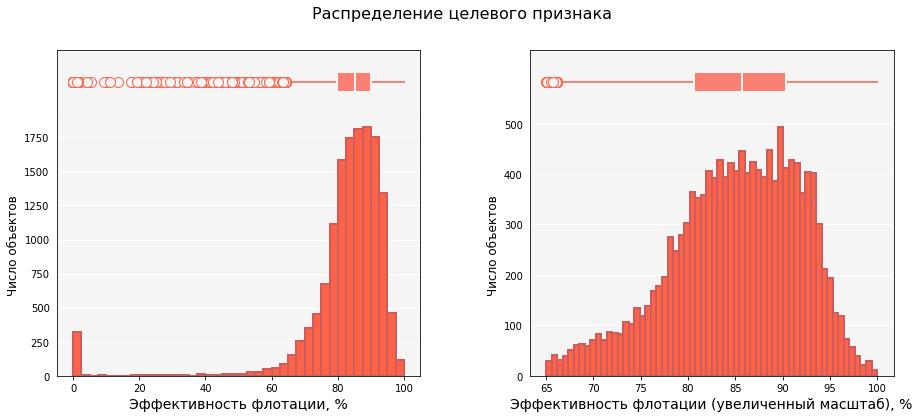

rougher.output.recovery
min                     0.000
50%                    85.236
mean                   82.394
max                   100.000

In [26]:
plot_distribution(
    [data_rougher['rougher.output.recovery'], data_rougher[data_rougher['rougher.output.recovery'] > 65]['rougher.output.recovery']], 
    xlabels=['Эффективность флотации, %', 'Эффективность флотации (увеличенный масштаб), %'], 
    title='Распределение целевого признака', bins=[40, 60]
)
data_rougher['rougher.output.recovery'].describe().loc[['min','50%','mean','max']].to_frame()

Распределение выглядит правдоподобно: область определения $[0; 100]\%$, в среднем $recovery \sim 85\%$. 

Однако на гистограмме есть пик в нуле, что кажется странным.

In [27]:
print('Содержание золота\n\tв сырье: {:.1f}%\n\tпосле флотации: {:.1f}%\n\tв хвосте: {:.1f}%'.format(
    data_rougher[data_rougher['rougher.output.recovery'] == 0]['rougher.input.feed_au'].mean(),
    data_rougher[data_rougher['rougher.output.recovery'] == 0]['rougher.output.concentrate_au'].mean(),
    data_rougher[data_rougher['rougher.output.recovery'] == 0]['rougher.output.tail_au'].mean()
))

Содержание золота
	в сырье: 8.3%
	после флотации: 0.0%
	в хвосте: 1.9%


В строках с нулевым таргетом концентрации всех металлов после флотации нулевые, при этом исходные концентрации были отличны от нуля. Удалим объекты из выборки.

In [28]:
n = len(data_rougher)
data_rougher = data_rougher[data_rougher['rougher.output.recovery'] != 0]
print('Удалили {} объектов'.format(n - len(data_rougher)))

Удалили 320 объектов


У распределения остался тяжёлый левый хвост. В целом, наличие небольшого числа строк с низкой эффективностью обогащения кажется вполне допустимым, поэтому обрезать хвост не будем. Важно, чтобы модель обучалась на реальных объектах, в т.ч. на объектах с убыточными характеристиками.

### Параметры сырья<a class="tocSkip">

К этим параметрам относятся концентрации металлов в сырье, информация о флотационных реагентах, размер гранул и скорость подачи руды во флотационную установку.

In [29]:
input_columns = [col  for col in data_rougher.columns if 'input' in col]
input_columns.sort(key=lambda s: len(s))

In [30]:
data_rougher[input_columns].describe().loc[['min', 'mean', '50%', 'max', 'count']].T

min    mean     50%     max     count
rougher.input.feed_ag              0.010   8.553   8.139  14.596 13967.000
rougher.input.feed_pb              0.010   3.512   3.412   7.143 13844.000
rougher.input.feed_au              0.010   7.830   7.623  13.126 13967.000
rougher.input.feed_sol             0.010  36.250  36.978  48.363 13876.000
rougher.input.feed_rate            0.013 474.371 499.574 717.509 13955.000
rougher.input.feed_size            9.660  60.090  55.394 484.967 13819.000
rougher.input.floatbank10_sulfate  0.001  11.677  11.598  36.118 13936.000
rougher.input.floatbank11_sulfate  0.000  11.287  11.250  37.981 13936.000
rougher.input.floatbank10_xanthate 0.001   5.859   5.979   9.703 13959.000
rougher.input.floatbank11_xanthate 0.000   5.899   5.999   9.698 13558.000

Масштабы признаков кажутся правильными: концентрации $\leq100\%$, скорость и размеры гранул положительные.  
Построим гистограммы.

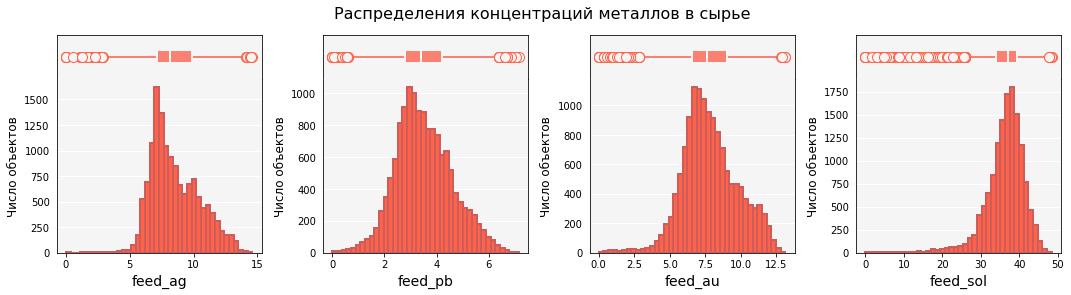

In [31]:
plot_distribution(
    [data_rougher[col] for col in input_columns[:4]], xlabels=[s.split('.')[-1] for s in input_columns[:4]],
    bins=[40]*4, figsize=(18,4), title='Распределения концентраций металлов в сырье'
)

У всех распределений тяжёлые левые хвосты. В появлении таких маленьких значений, кажется, нет ничего удивительного — причина может быть, например, в плохом сырье. Нам важно обучить модель на реальных данных о концентрациях, поэтому не будем избавляться от выбросов.

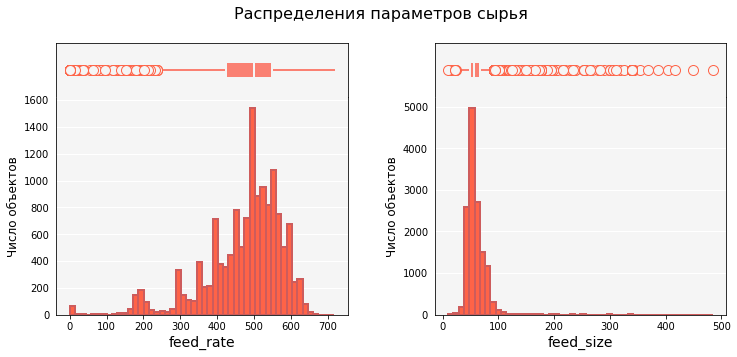

In [32]:
plot_distribution(
    [data_rougher[col] for col in input_columns[4:6]], xlabels=[s.split('.')[-1] for s in input_columns[4:6]], 
    bins=[50]*2, figsize=(12,5), title='Распределения параметров сырья'
)

На распределении скорости подачи руды видно несколько пиков в области 200, 300, 400 и т.д. Средняя скорость подачи сырья равна 500.  
Размеры гранул варьируются в широких пределах от нуля до 500. У распределения длинный правый хвост.

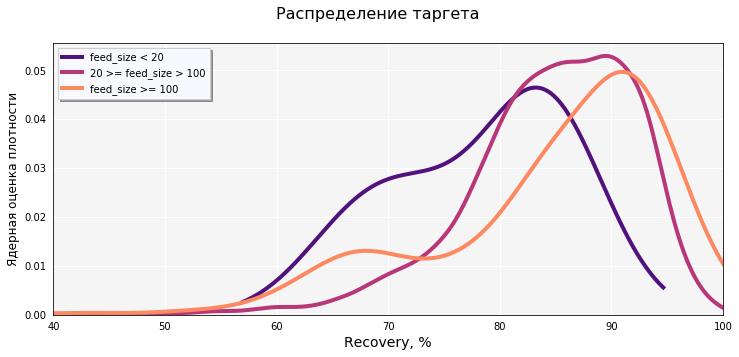

In [33]:
s1 = 'rougher.input.feed_size'
s2 = 'rougher.output.recovery'
plot_kde([
    data_rougher[data_rougher[s1] < 20][s2],
    data_rougher[(data_rougher[s1] >= 20) & (data_rougher[s1] < 100)][s2],
    data_rougher[data_rougher[s1] >= 100][s2]
], 'Recovery, %', ['feed_size < 20', '20 >= feed_size > 100', 'feed_size >= 100'], 
    title='Распределение таргета', xlim=(40,100))

Видим, что как при очень маленьких размерах гранул сырья (<20), так и при очень больших (>100) распределение таргета выглядит вполне адекватно. Также видно, что в среднем эффективность флотации растёт с увеличением `feed_size`. Будем считать допустимымм наличие выбросов в `feed_size`. 

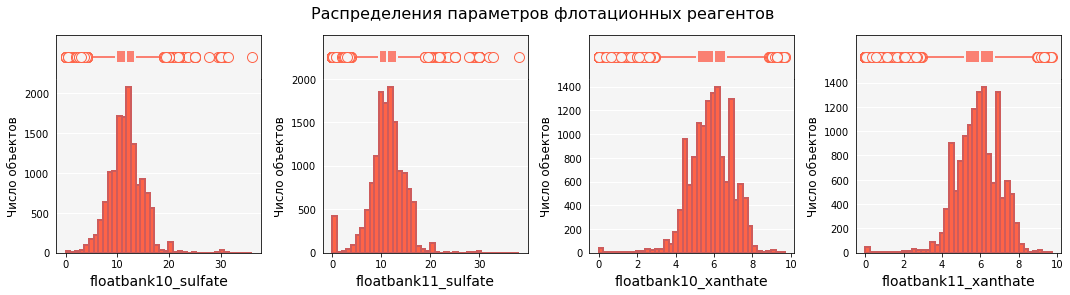

In [34]:
plot_distribution(
    [data_rougher[col] for col in input_columns[6:]], xlabels=[s.split('.')[-1] for s in input_columns[6:]], 
    bins=[40]*4, figsize=(18,4), title='Распределения параметров флотационных реагентов'
)

С этими рапределениями тоже всё в порядке :)  
На гистограмме `floatbank11_sulfate` виден пик в нуле $\to$ этот реагент не всегда используется при флотации. 

Перейдём к пропускам.

In [35]:
pd.DataFrame(data_rougher[input_columns].isna().sum(), columns=['Число пропусков'])

Число пропусков
rougher.input.feed_ag                             0
rougher.input.feed_pb                           123
rougher.input.feed_au                             0
rougher.input.feed_sol                           91
rougher.input.feed_rate                          12
rougher.input.feed_size                         148
rougher.input.floatbank10_sulfate                31
rougher.input.floatbank11_sulfate                31
rougher.input.floatbank10_xanthate                8
rougher.input.floatbank11_xanthate              409

Пропусков довольно много.  
В столбце с начальной концентрацией золота пропусков нет, что хорошо, т.к. этот признак кажется наиболее значимым :) 

Пропуски можно либо удалить, либо заполнить.  
Нам известно, что соседние по времени параметры часто похожи. Проверим, действительно ли это так. Выберем промежуток времени в 2 недели.

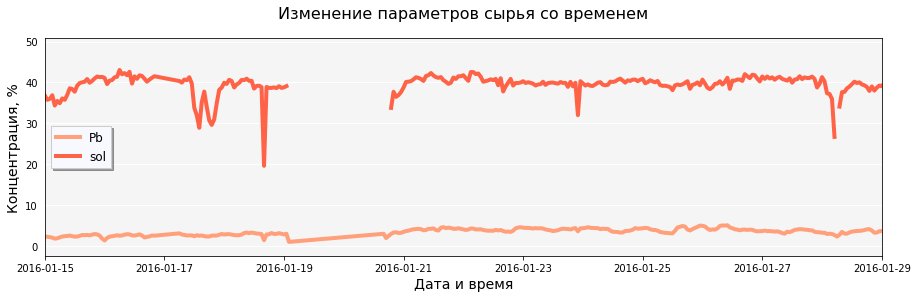

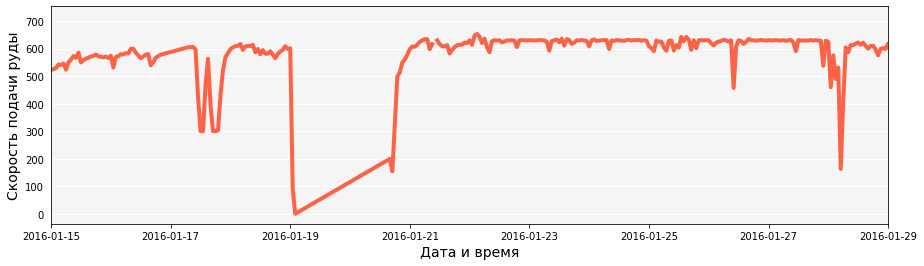

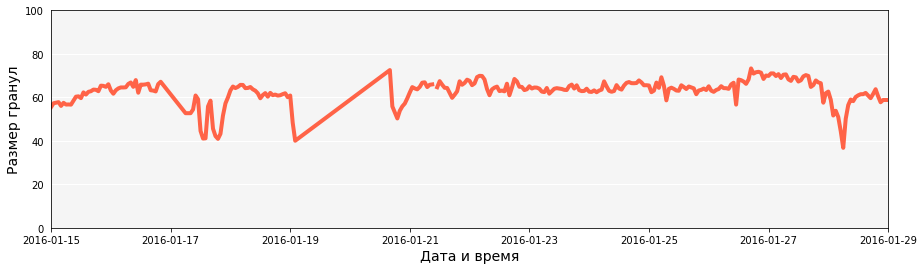

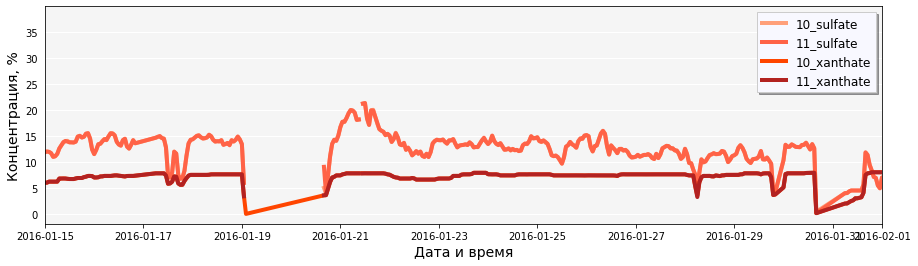

In [36]:
s = 'rougher.input.'
xlim = ('2016-01-15','2016-01-29')
plot_lines(
    data_rougher.index, [data_rougher[s + col] for col in ['feed_pb', 'feed_sol']], 'Дата и время', 
    'Концентрация, %', xlim=xlim, labels=['Pb','sol'], title='Изменение параметров сырья со временем'
)
plot_lines(
    data_rougher.index, data_rougher[s + 'feed_rate'], 'Дата и время', 'Скорость подачи руды', xlim=xlim
)
plot_lines(
    data_rougher.index, data_rougher[s + 'feed_size'], 'Дата и время', 'Размер гранул', xlim=xlim, ylim=(0,100)
)
l = ['10_sulfate', '11_sulfate', '10_xanthate', '11_xanthate']
plot_lines(
    data_rougher.index, [data_rougher['rougher.input.floatbank' + col] for col in l],
    'Дата и время', 'Концентрация, %', xlim=('2016-01-15','2016-02-01'), labels=l
)

На всех графиках параметры относительно плавно меняются со временем. Следовательно, пропуски можно заполнять предыдущим значением. С другой стороны, распределения почти всех признаков унимодальны, поэтому пропуски можно заполнить, например, медианой или средним арифметическим. Далее сравним эти способы и выберем модель с лучшим качеством.

### Параметры, характеризующие текущее состояние этапа<a class="tocSkip">

К этим параметрам относится объём воздуха и уровень жидкости на шести этапах флотации $a-f$. Посмотрим, какие значения принимают признаки.

In [37]:
air_columns = [col  for col in data_rougher.columns if 'air' in col]
level_columns = [col  for col in data_rougher.columns if 'level' in col]
state_columns = air_columns + level_columns
data_rougher[state_columns].describe().loc[['min', 'mean', '50%', 'max', 'count']].T

min     mean      50%      max  \
rougher.state.floatbank10_a_air     -0.041 1123.326 1001.656 1521.980   
rougher.state.floatbank10_b_air     -0.653 1323.233 1301.604 1809.194   
rougher.state.floatbank10_c_air     -0.035 1302.096 1300.402 2499.129   
rougher.state.floatbank10_d_air     -0.554 1213.662 1200.969 1817.199   
rougher.state.floatbank10_e_air     -1.970 1091.489 1050.660 1922.637   
rougher.state.floatbank10_f_air     -2.431 1037.625 1000.097 1706.308   
rougher.state.floatbank10_a_level -650.203 -370.539 -300.182 -281.039   
rougher.state.floatbank10_b_level -650.260 -464.023 -499.761 -296.383   
rougher.state.floatbank10_c_level -640.996 -464.838 -499.676 -292.156   
rougher.state.floatbank10_d_level -640.519 -465.316 -499.463 -282.986   
rougher.state.floatbank10_e_level -649.444 -464.697 -499.603 -272.200   
rougher.state.floatbank10_f_level -649.881 -464.524 -499.355 -191.718   

                                      count  
rougher.state.floatbank10_a_air   13966.000  
rougher.state.floatbank10_b_air   13966.000  
rougher.state.floatbank10_c_air   13966.000  
rougher.state.floatbank10_d_air   13967.000  
rougher.state.floatbank10_e_air   13591.000  
rougher.state.floatbank10_f_air   13967.000  
rougher.state.floatbank10_a_level 13966.000  
rougher.state.floatbank10_b_level 13966.000  
rougher.state.floatbank10_c_level 13966.000  
rougher.state.floatbank10_d_level 13967.000  
rougher.state.floatbank10_e_level 13967.000  
rougher.state.floatbank10_f_level 13967.000

Уровень жидкости во всех строках отрицателен — это ок.  
А вот отрицательный объём воздуха кажется странным. Изучим подробнее эти объекты.

In [38]:
pd.DataFrame({
    col : (data_rougher[col] < 0).sum() for col in air_columns
}, index=['Число объектов']).T

Число объектов
rougher.state.floatbank10_a_air               2
rougher.state.floatbank10_b_air               2
rougher.state.floatbank10_c_air               2
rougher.state.floatbank10_d_air               2
rougher.state.floatbank10_e_air               2
rougher.state.floatbank10_f_air               2

Отрицательные значения встречаются в двух строках — удалим их из выборки.

In [39]:
data_rougher = data_rougher[data_rougher[air_columns[0]] >= 0]

Изучим распределения.

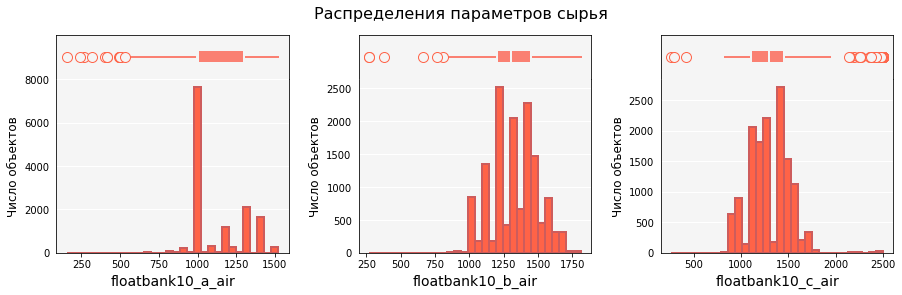

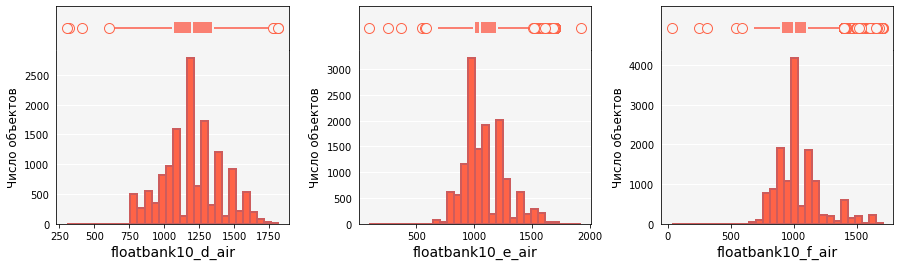

In [40]:
for i in range(2):
    plot_distribution(
        [data_rougher[col]for col in air_columns[i*3:(i+1)*3]], title='Распределения параметров сырья' * (i==0), 
        xlabels=[s.split('.')[-1] for s in air_columns[i*3:(i+1)*3]], bins=[30]*3, figsize=(15,4)
    )

Все распределения устроены довольно сложно: они имеют большое число пиков и длинные хвосты. В среднем объём воздуха на всех этапах ~1000-1200.

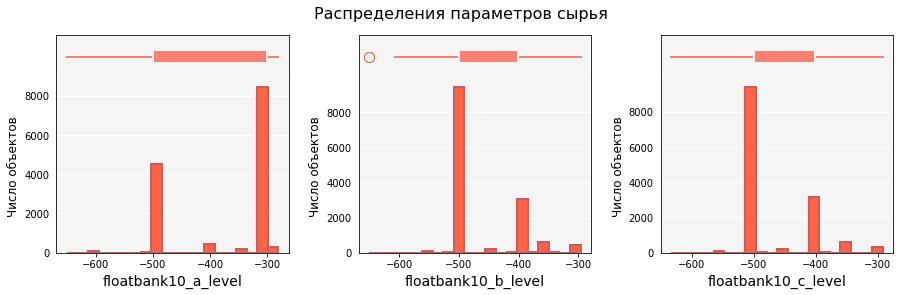

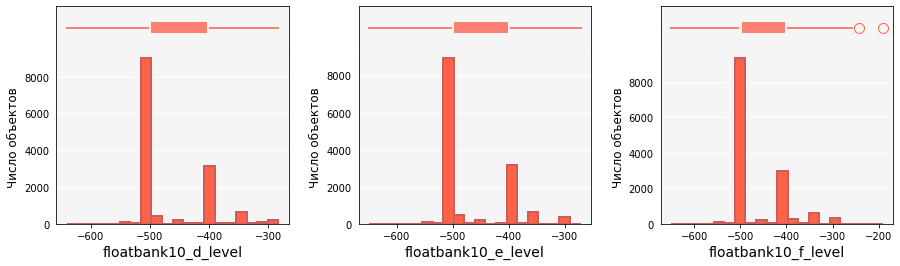

In [41]:
for i in range(2):
    plot_distribution(
        [data_rougher[col]for col in level_columns[i*3:(i+1)*3]], title='Распределения параметров сырья'*(i==0), 
        xlabels=[s.split('.')[-1] for s in level_columns[i*3:(i+1)*3]], bins=[20]*3, figsize=(15,4)
    )

Распределения уровня жидкости имеют три пика около -300, -400 и -500, однако встречаются и другие значения `level`. В целом, все распределения выглядят адекватно.

Перейдём к пропускам.

In [42]:
pd.DataFrame(data_rougher[state_columns].isna().sum(), columns=['Число пропусков'])

Число пропусков
rougher.state.floatbank10_a_air                  0
rougher.state.floatbank10_b_air                  0
rougher.state.floatbank10_c_air                  0
rougher.state.floatbank10_d_air                  0
rougher.state.floatbank10_e_air                376
rougher.state.floatbank10_f_air                  0
rougher.state.floatbank10_a_level                0
rougher.state.floatbank10_b_level                0
rougher.state.floatbank10_c_level                0
rougher.state.floatbank10_d_level                0
rougher.state.floatbank10_e_level                0
rougher.state.floatbank10_f_level                0

Пропуски есть в столбце `rougher.state.floatbank10_e_air`.

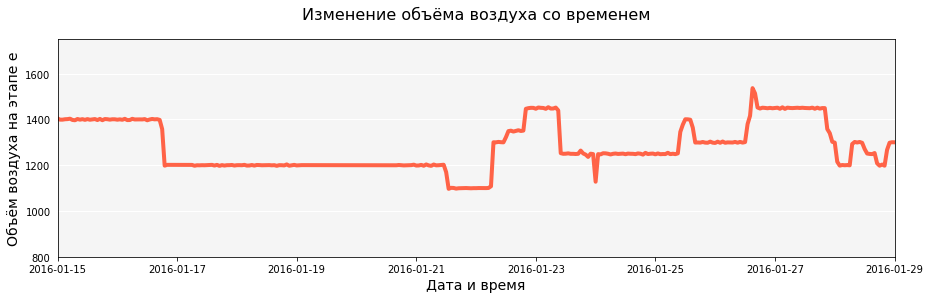

In [43]:
plot_lines(
    data_rougher.index, data_rougher['rougher.state.floatbank10_e_air'], 'Дата и время', 
    'Объём воздуха на этапе e', xlim=xlim, ylim=(800,1750), title='Изменение объёма воздуха со временем'
)

Видим, что пропуски в этом признаке тоже можно заполнять предыдущим значением.

### Вывод<a class="tocSkip">

Предобработка завершена.
* Удалены дубликаты, проанализированы неинформативные признаки.
* Изучены распределения признаков. Удалены артефакты, обработаны выбросы.
* Проанализированы способы заполнения пропусков.

## Анализ данных
[к оглавлению](#start)

Посмотрим, как изменилась концентрация металлов после флотации.

In [44]:
concentration_columns = [
    [('rougher.' + stage + '_' + metal) for stage in ['input.feed', 'output.concentrate', 'output.tail']] 
    for metal in ['au', 'ag', 'pb', 'sol']]
concentration_columns = pd.DataFrame(concentration_columns, index=['au', 'ag', 'pb', 'sol'],
                                     columns=['input', 'rougher', 'rougher_tail']).T
df = pd.DataFrame(
    [list(data_rougher[concentration_columns.iloc[i]].median()) for i in range(3)],
    index=['Сырьё', 'Черновой концентрат', 'Отвальный хвост'], columns=concentration_columns.columns
)

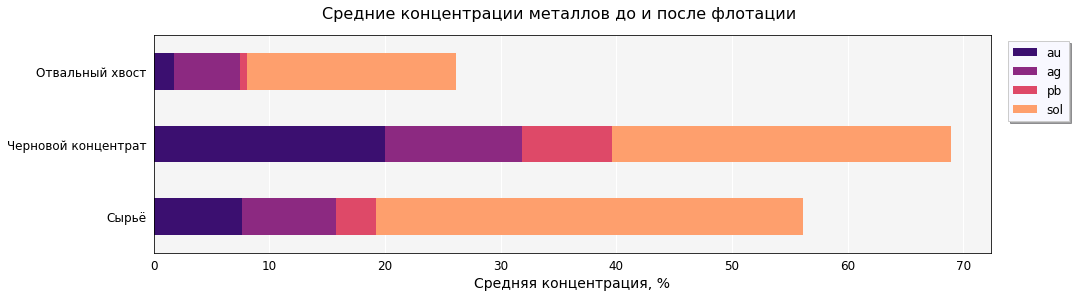

In [45]:
plot_bar(df, 'Средние концентрации металлов до и после флотации', 'Средняя концентрация, %')

Видим, что после флотации средняя концентрация золота увеличилась. В отвальном хвосте золото также присутствует, но его концентрация намного ниже.  
Исходя из содержяния элементов в отвальном хвосте, можно сделать вывод, что флотация позволяет снизить содержание в руде серебра и компонента `sol`. Кроме того, суммарная концентрация известных элементов в отвальном хвосте менее $30\% \to$ на этапе флотации происходит очистка руды от других компонентов, о которых у нас нет информации.

Изучим распределения суммарных концентраций.

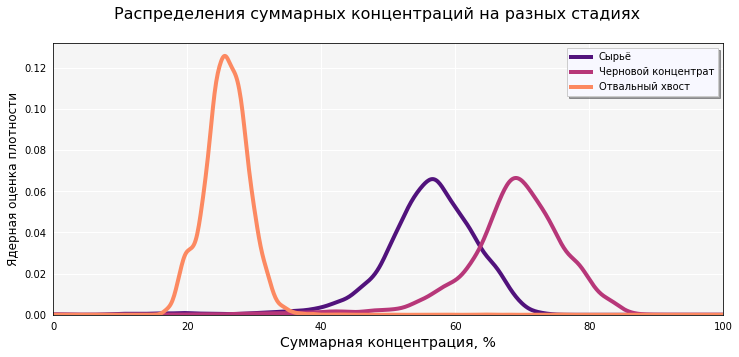

In [46]:
plot_kde(
    [data_rougher[concentration_columns.iloc[i]].sum(axis=1) for i in range(3)], 'Суммарная концентрация, %', 
    labels=['Сырьё', 'Черновой концентрат', 'Отвальный хвост'], xlim=(0,100), 
    title='Распределения суммарных концентраций на разных стадиях'
    
)

Действительно, суммарные концентрации металлов до и после флотации отличаются от $100\%$. Значит, в руде присутствуют другие компоненты помимо Au, Ag, Pb и sol, концентрации которых нам неизвестны. Поскольку суммарная концентрация этих металлов в черновом концентрате в среднем больше, чем в сырье, а в отвальном хвосте, наоборот, меньше, можно сделать вывод, что флотация позволила частично очистить руду от этих компонентов.

Области определения суммарных концентраций верные (от нуля до 100%), поэтому будем считать, что с данными всё в порядке.
___

Теперь посмотрим, есть ли  взаимосвязь между признаками в выборке, и как они влияют на целевую переменную. Для этого посчитаем коэффициенты корреляции. <a id="corr"></a>

In [47]:
data_rougher = data_rougher[input_columns + state_columns + ['rougher.output.recovery']]
data_test_rougher = data_test_rougher[input_columns + state_columns + ['rougher.output.recovery']]

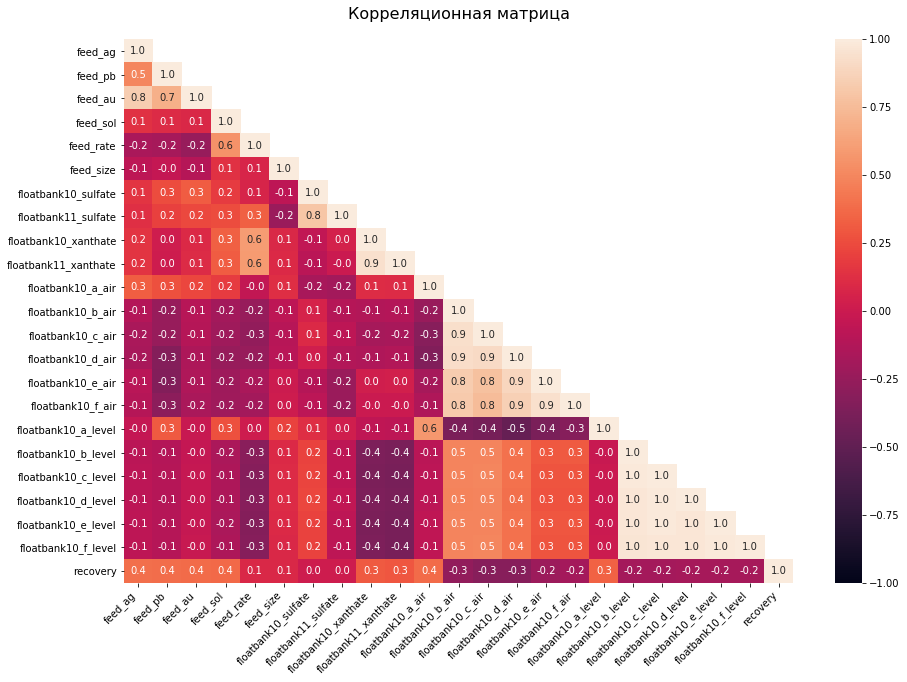

In [48]:
plot_corr_matrix(data_rougher.corr(), labels=[col.split('.')[-1] for col in data_rougher.columns])

* В выборке есть сильно скоррелированные признаки (объёмы воздуха на различных этапах флотации a-f практически линейно зависимы, то же можно сказать об уровнях жидкости на этапах a-f, а также концентрациях $Na_2S$ и ксантогената на этапах 10 и 11). Также интересно, что концентрации золота и серебра в сырье скоррелированы.
* Корреляция с таргетом у всех признаков относительно невысокая. Наибольшая связь имеется с концентрациями металлов в сырье, а также с некоторыми техническими параметрами флотации (объёмом воздуха и уровнем жидкости на этапе a) и содержанием флотационных реагентов (ксантогената). Корреляция со скоростью подачи руды, размерами гранул сырья и концентрацией $Na_2S$ практически нулевая.

Возможно, связь нелинейная. Изучим диаграммы рассеяния.

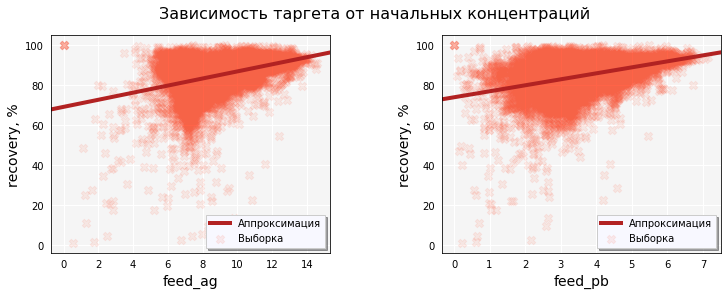

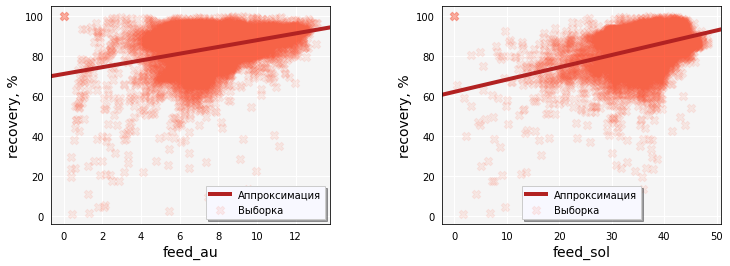

In [49]:
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in input_columns[:2]], 
    xlabels=[input_columns[i].split('.')[-1] for i in [0,1]], ylabels=['recovery, %'] * 2, 
    title='Зависимость таргета от начальных концентраций', figsize=(12,4)
)
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in input_columns[2:4]], 
    xlabels=[input_columns[i].split('.')[-1] for i in [2,3]], ylabels=['recovery, %'] * 2, figsize=(12,4)
)

Зависимость таргета от начальных концентраций окололинейна: линейная аппроксимация визуально неплохо её описывает. В области низких концентраций зависимость, кажется, отклоняется от линейной и значения recovery уменьшаются быстрее.

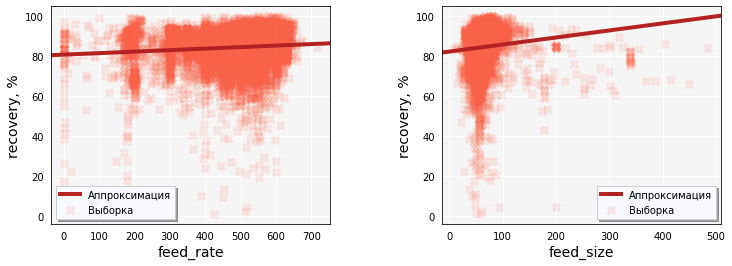

In [50]:
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in input_columns[4:6]], 
    xlabels=[input_columns[i].split('.')[-1] for i in [4,5]], ylabels=['recovery, %'] * 2, figsize=(12,4)
)

Связи recovery со скорость подачи руды на графике видно. А вот с увеличением размеров гранул сырья значения таргета растут, однако этот рост довольно плохо описывается прямой линией — имеет смысл обучать нелинейные модели.

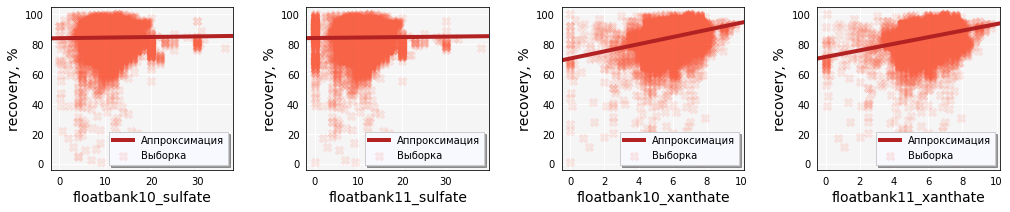

In [51]:
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in input_columns[6:]], 
    xlabels=[input_columns[i].split('.')[-1] for i in [6,7,8,9]], ylabels=['recovery, %'] * 4, figsize=(17,3)
)

Концентрация $Na_2S$, похоже, не влияет на таргет. А вот добавление ксантогената положительно влияет на эффективность обогащения :)

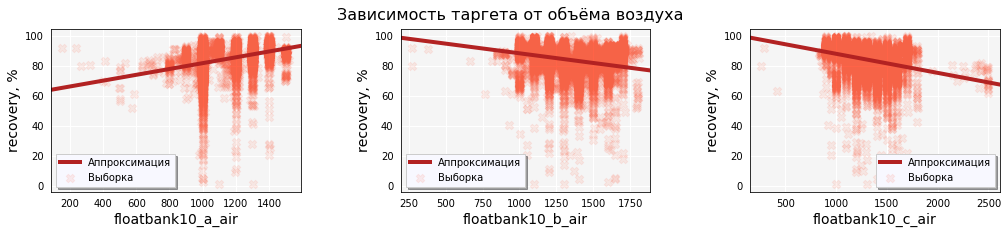

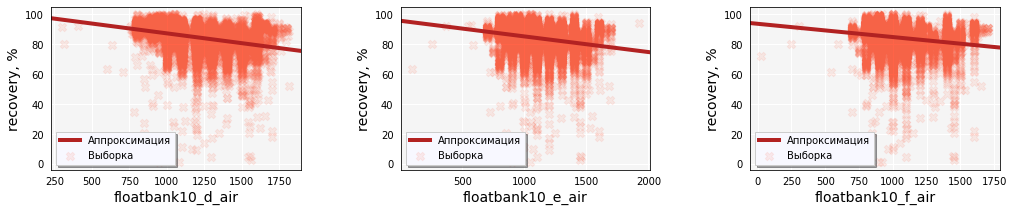

In [52]:
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in air_columns[:3]], 
    xlabels=[air_columns[i].split('.')[-1] for i in [0,1,2]], ylabels=['recovery, %'] * 3, 
    title='Зависимость таргета от объёма воздуха', figsize=(17,3)
)
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in air_columns[3:]], 
    xlabels=[air_columns[i].split('.')[-1] for i in [3,4,5]], ylabels=['recovery, %'] * 3, figsize=(17,3)
)

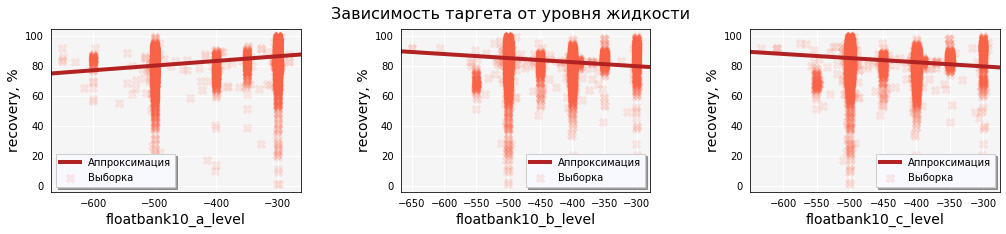

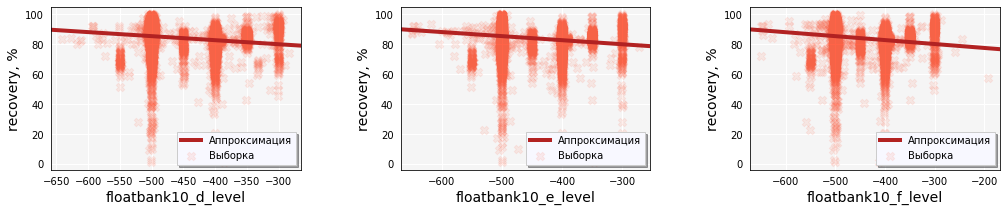

In [53]:
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in level_columns[:3]], 
    xlabels=[level_columns[i].split('.')[-1] for i in [0,1,2]], ylabels=['recovery, %'] * 3, 
    title='Зависимость таргета от уровня жидкости', figsize=(17,3)
)
plot_scatter(
    [data_rougher[[col, 'rougher.output.recovery']] for col in level_columns[3:]], 
    xlabels=[level_columns[i].split('.')[-1] for i in [3,4,5]], ylabels=['recovery, %'] * 3, figsize=(17,3)
)

Из этих графиков видим, что на эффективность обогащения влияют как объём воздуха, так и уровень жидкости, особенно на этапе a.

### Вывод <a class="tocSkip">

Анализ данных об этапе флотации показал:
* Концентрация золота в черновом концентрате в среднем выше, чем в сырье. Концентрация золота в отвальном хвосте в среднем отлична от нуля, но довольно низкая.
* На распределениях суммарных концентраций металлов до и после флотации аномалий не обнаружено.

Таким образом, данные кажутся адекватными и подходят для обучения модели.

Анализ корреляционной матрицы и диаграмм рассеяния показал:
* В выборке есть много линейно зависимых признаков. Эту особенность необходимо учесть при обучении линейной модели.
* Практически все признаки имеют отличную от нуля корреляцию с целевым признаком. На диаграммах рассеяния наблюдается прямая связь многих признаков с таргетом. Однако разброс значений довольно высокий, что может усложнить обучение модели.
* Наиболее сильная взаимосвязь с таргетом наблюдается у начальных концентраций металлов в руде, содержания ксантогената, а также уровня жидкости и объёма воздуха на этапе a. 
* Содержание $Na_2S$ и скорость подачи руды во флотационную установку напрямую с таргетом не связаны.

## Обучение модели 
[к оглавлению](#start)

Итак перед нами задача регрессии, метрика качества — sMAPE. Раасмотрим несколько моделей машинного обучения и подберём на кросс-валидации оптимальные гиперпараметры. Для начала рассмотрим константную модель.

### Качество константной модели<a class="tocSkip">

In [54]:
x_train = data_rougher.drop(columns=['rougher.output.recovery'])
y_train = data_rougher['rougher.output.recovery']
x_test = data_test_rougher.drop(columns=['rougher.output.recovery'])
y_test = data_test_rougher['rougher.output.recovery']
print('{} объектов в обучении и {} в тесте'.format(len(x_train), len(x_test)))

13964 объектов в обучении и 5211 в тесте


In [55]:
def get_scores(true, pred):
    scores = pd.Series({
        'sMAPE': smape(true, pred),
        'RMSE': mean_squared_error(true, pred)**0.5,
        'MAE': mean_absolute_error(true, pred),
        'R2': r2_score(true, pred),
    })
    return scores

In [56]:
scores = pd.DataFrame(
    columns=['Этап', 'Модель', 'Пропуски', 'sMAPE', 'RMSE', 'MAE', 'R2']
).set_index(['Этап', 'Модель', 'Пропуски'])
pred_constant_rougher = pd.Series([y_test.median()] * len(y_test), index=y_test.index)
scores.loc[('Флотация', 'Константная модель', '—'),] = get_scores(y_test, pred_constant_rougher)
scores

sMAPE  RMSE   MAE     R2
Этап     Модель             Пропуски                         
Флотация Константная модель —        4.556 6.331 3.770 -0.021

Качество неплохое, попробуем его улучшить :)
___
Составим пайплайн обучения модели. Он будет включать предобработку (заполнение пропусков, добавление признаков 2 и более высоких порядков и масштабирование) и обучение модели. Для заполнения пропусков был создан класс `MyImputer()` — аналог `SimpleImputer()` из `sklearn`, который позволяет заполнять пропуски не только средним/медианой, но и предыдущим значением.

In [57]:
preprocessor = Pipeline(steps=[
    ('imputer', MyImputer(strategy='ffill')),
    ('num_poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())
])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', None)
])

### Линейная регрессия

На этапе анализа данных мы видели, что многие признаки линейно связаны с таргетом, поэтому начнём с обучения простой модели — линейной регрессии. Будем варьировать тип и коэффициент регуляризации, а также различные способы предобработки:
* заполнение пропусков медианой/средним/предыдущим значением
* степень `PolynomialFeatures`
* тип масштабирования

*подбор гиперпараметров проводился так $\downarrow$*

```python
parameters_grid_lr = {
    'preprocessor__imputer': [MyImputer(strategy='ffill'), MyImputer(strategy='mean'), MyImputer(strategy='median')],
    'preprocessor__num_poly__degree': [1, 2, 3],
    'preprocessor__scaler': [StandardScaler(), MinMaxScaler()], 
    'model': [Ridge(random_state=42), Lasso(random_state=42)], 
    'model__alpha': [10**i for i in np.arange(-2,5,0.5)]
}
gs = GridSearch(pipeline, parameters_grid_lr, dropna=False)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 7.775
```

Оценим качество модели с оптимальными гиперпараметрами.

In [58]:
params_lr = {
    'preprocessor__imputer': MyImputer(strategy='ffill'),
    'preprocessor__num_poly__degree': 1,
    'preprocessor__scaler': StandardScaler(),
    'model': Ridge(alpha=10**3.5, random_state=42),
}

In [59]:
cv_scores = scores.copy()
pred_constant = pd.Series([y_train.median()] * len(y_train), index=y_train.index)
cv_scores.loc[('Флотация', 'Константная модель', '—'),] = get_scores(y_train, pred_constant)

In [60]:
pipeline.set_params(**params_lr)
cv_scores.loc[('Флотация', 'Линейная регрессия', 'ffill'),] = cv_score(x_train, y_train, pipeline, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап     Модель             Пропуски                         
Флотация Константная модель —        7.615 8.681 6.182 -0.018
         Линейная регрессия ffill    7.775 8.339 6.264 -0.283

Качество получилось хуже, чем у константной модели :(  Интересно, что добавление в выборку признаков 2 и выше порядков ещё ухудшало качество.  
В этой модели пропуски заполняются предыдущим значением. Возможно, будет лучше удалить из обучающей выборки все объекты с пропусками, а заполнять их только в валидационной/тестовой.

```python
gs = GridSearch(pipeline, parameters_grid_lr, dropna=True)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 7.858
```

In [61]:
params_lr2 = params_lr

In [62]:
pipeline.set_params(**params_lr2)
cv_scores.loc[('Флотация', 'Линейная регрессия', 'drop'),] = cv_score(x_train, y_train, pipeline, dropna=True, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап     Модель             Пропуски                         
Флотация Константная модель —        7.615 8.681 6.182 -0.018
         Линейная регрессия ffill    7.775 8.339 6.264 -0.283
                            drop     7.858 8.441 6.335 -0.317

Нет, не лучше) Тогда рассмотрим более сложную модель — случайный лес.

### Случайный лес

Будем варьировать гиперпараметры:
* максимальная глубина базового дерева
* минимальное число объектов в листьях
* максимальное число признаков, учитывающихся при поиске лучшего разбиения

Добавлять признаки второго порядка не будем, масштабировать признаки — тоже, т.к. для деревянных алгоритмов это не требуется.

```python
pipeline.set_params(
    preprocessor__num_poly = None,
    preprocessor__scaler = None,
    preprocessor__imputer = MyImputer(strategy='ffill'),
    model = RandomForestRegressor(random_state=42, n_estimators=100)
)
parameters_grid_rf = {
    'preprocessor__imputer': [MyImputer(strategy='ffill'), MyImputer(strategy='mean'), MyImputer(strategy='median')],
    'model__max_depth' : [10, 15, 20, 30], 
    'model__min_samples_leaf': [1, 20, 40, 70],
    'model__max_features' : [0.5, 0.6, 0.8]
}
gs = GridSearch(pipeline, parameters_grid_rf, dropna=False)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 7.907
```

In [63]:
params_rf = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='ffill'),
    'model': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=30, 
                                    min_samples_leaf=40, max_features=0.5)
}

In [64]:
pipeline.set_params(**params_rf)
cv_scores.loc[('Флотация', 'Случайный лес', 'ffill'),] = cv_score(x_train, y_train, pipeline, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап     Модель             Пропуски                         
Флотация Константная модель —        7.615 8.681 6.182 -0.018
         Линейная регрессия ffill    7.775 8.339 6.264 -0.283
                            drop     7.858 8.441 6.335 -0.317
         Случайный лес      ffill    7.907 8.355 6.379 -0.297

Качество снова ухудшилось. Попробуем удалить объекты с пропусками.

```python
gs = GridSearch(pipeline, parameters_grid_rf, dropna=True)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 7.680
```

In [65]:
params_rf2 = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='ffill'),
    'model': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, 
                                    min_samples_leaf=70, max_features=0.6)
}

Оптимальным оказался лес из 100 относительно неглубоких деревьев. Посмотрим на качество.

In [66]:
pipeline.set_params(**params_rf2)
cv_scores.loc[('Флотация', 'Случайный лес', 'drop'),] = cv_score(x_train, y_train, pipeline, dropna=True, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап     Модель             Пропуски                         
Флотация Константная модель —        7.615 8.681 6.182 -0.018
         Линейная регрессия ffill    7.775 8.339 6.264 -0.283
                            drop     7.858 8.441 6.335 -0.317
         Случайный лес      ffill    7.907 8.355 6.379 -0.297
                            drop     7.680 8.286 6.209 -0.258

У этой модели качество наилучшее, хотя она всё ещё немного отстаёт от константной модели. Похоже, обучение деревянного алгоритма было оправданным. Поэтому имеет смысл перейти к более сложной модели — градиентному бустингу над решающими деревьями.

### Градиентный бустинг

Варьируем:
* глубину деревьев
* число базовых моделей
* скорость обучения

```python
pipeline.set_params(
    preprocessor__num_poly = None,
    preprocessor__scaler = None,
    preprocessor__imputer = MyImputer(strategy='ffill'),
    model = LGBMRegressor(random_state=42, verbose=None)
)
parameters_grid = {
    'preprocessor__imputer': [MyImputer(strategy='ffill')],
    'model__max_depth' : [15, 20], 
    'model__n_estimators' : [100, 150],
    'model__learning_rate' : [0.01]
}
gs = GridSearch(pipeline, parameters_grid, dropna=False)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 8.322
```

In [67]:
params_gb = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='ffill'),
    'model': LGBMRegressor(random_state=42, verbose=None, max_depth=15,
                           n_estimators=150, learning_rate=0.01)
}

In [68]:
pipeline.set_params(**params_gb)
cv_scores.loc[('Флотация', 'Градиентный бустинг', 'ffill'),] = cv_score(x_train, y_train, pipeline, gs=False)
cv_scores

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 9310, number of used features: 22
[LightGBM] [Info] Start training from score 86.915480
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002882 seconds.
You can set `force_col_wise=

sMAPE  RMSE   MAE     R2
Этап     Модель              Пропуски                         
Флотация Константная модель  —        7.615 8.681 6.182 -0.018
         Линейная регрессия  ffill    7.775 8.339 6.264 -0.283
                             drop     7.858 8.441 6.335 -0.317
         Случайный лес       ffill    7.907 8.355 6.379 -0.297
                             drop     7.680 8.286 6.209 -0.258
         Градиентный бустинг ffill    8.322 8.824 6.707 -0.436

Качество значительно ухудшилось :(

```python
gs = GridSearch(pipeline, parameters_grid, dropna=True)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 8.103
```

In [69]:
params_gb2 = params_gb

In [70]:
pipeline.set_params(**params_gb2)
cv_scores.loc[('Флотация', 'Градиентный бустинг', 'drop'),] = cv_score(x_train, y_train, pipeline, dropna=True, gs=False)
cv_scores

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 8367, number of used features: 22
[LightGBM] [Info] Start training from score 87.058338
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003258 seconds.
You can set `force_col_wise=

sMAPE  RMSE   MAE     R2
Этап     Модель              Пропуски                         
Флотация Константная модель  —        7.615 8.681 6.182 -0.018
         Линейная регрессия  ffill    7.775 8.339 6.264 -0.283
                             drop     7.858 8.441 6.335 -0.317
         Случайный лес       ffill    7.907 8.355 6.379 -0.297
                             drop     7.680 8.286 6.209 -0.258
         Градиентный бустинг ffill    8.322 8.824 6.707 -0.436
                             drop     8.103 8.579 6.562 -0.347

Обучение на очищенных данных немного улучшило качество, но бустинг всё равно уступает и случайному лесу, и линейной регрессии.

### Сравнительный анализ
Посмотрим на сравнительную таблицу sMAPE всех построенных моделей.

In [71]:
cv_scores

sMAPE  RMSE   MAE     R2
Этап     Модель              Пропуски                         
Флотация Константная модель  —        7.615 8.681 6.182 -0.018
         Линейная регрессия  ffill    7.775 8.339 6.264 -0.283
                             drop     7.858 8.441 6.335 -0.317
         Случайный лес       ffill    7.907 8.355 6.379 -0.297
                             drop     7.680 8.286 6.209 -0.258
         Градиентный бустинг ffill    8.322 8.824 6.707 -0.436
                             drop     8.103 8.579 6.562 -0.347

Лучшее качество у случайного леса, обученного на очищенных данных. При этом, он немного уступает константной модели. Оценим качество этой модели на тестовой выборке и сравним с константной.

In [72]:
pipeline.set_params(**params_rf2)
pipeline.fit(x_train.dropna(), y_train.loc[x_train.dropna().index])
pred_rougher = pipeline.predict(x_test)

In [73]:
scores.loc[('Флотация', 'Случайный лес', 'drop'),] = get_scores(y_test, pred_rougher)
scores

sMAPE  RMSE   MAE     R2
Этап     Модель             Пропуски                         
Флотация Константная модель —        4.556 6.331 3.770 -0.021
         Случайный лес      drop     4.294 5.333 3.525  0.275

Оценка на тестовой выборке показывает, что случайный лес лучше, чем константная модель. Вероятно, такое отличие объясняется тем, что модель обучалась на всей train выборке (а не на отдельных частях как при оценке качества на кросс-валидации). Тем не менее, качество модели далеко от идеала, если смотреть, например, на коэффициент детерминации, который очень далёк от единицы.

Посмотрим, какие признаки учитывались при построении модели.

In [74]:
feature_weights = pd.DataFrame(pipeline['model'].feature_importances_, index=x_train.columns, columns=['Значимость'])
feature_weights.sort_values(by='Значимость', ascending=False)

Значимость
rougher.input.feed_ag                    0.189
rougher.state.floatbank10_a_air          0.175
rougher.state.floatbank10_a_level        0.111
rougher.input.feed_pb                    0.084
rougher.input.feed_au                    0.059
rougher.input.feed_size                  0.048
rougher.state.floatbank10_c_air          0.048
rougher.input.feed_sol                   0.045
rougher.input.floatbank10_xanthate       0.040
rougher.input.floatbank11_xanthate       0.033
rougher.state.floatbank10_d_air          0.024
rougher.state.floatbank10_e_air          0.021
rougher.state.floatbank10_b_air          0.018
rougher.state.floatbank10_f_air          0.014
rougher.state.floatbank10_b_level        0.014
rougher.state.floatbank10_c_level        0.014
rougher.state.floatbank10_e_level        0.013
rougher.input.floatbank11_sulfate        0.013
rougher.input.floatbank10_sulfate        0.011
rougher.state.floatbank10_d_level        0.010
rougher.input.feed_rate                  0.009
rougher.state.floatbank10_f_level        0.007

Видим, что в топе по значимости оказались все те признаки, котрые мы выделили на этапе анализа данных: концентрации металлов в сырье, объём воздуха и уровень жидкости на этапе a и содержание ксантогената. В то же время содержание $Na_2S$ и скорость подачи сырья, связь которых с таргетом мы не нашли на этапе анализа, получили маленькие веса.  
Интересно, что наиболее значимой оказалась концентрация в руде серебра, а не золота.

Можно сделать вывод, что модель адекватна :)

### Анализ остатков  <a class="tocSkip">
    
Посмотрим на предсказания модели для объектов с разными значениями recovery.

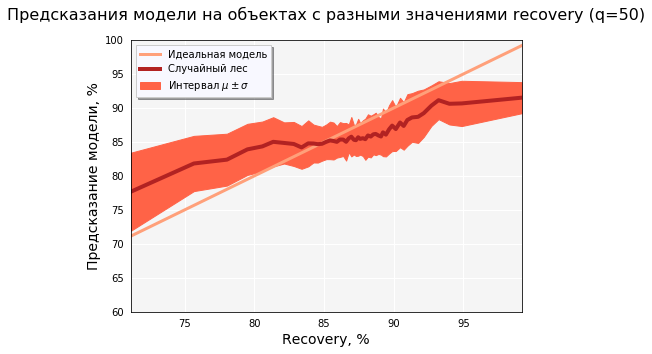

In [75]:
plot_true_pred(y_test, pred_rougher, label='Случайный лес', ylim=(60,100), q=50)

Видим, что модель отличается от константной: предсказания в среднем возрастают с ростом recovery. Наиболее точные предсказания получаются для recovery = 85%. Это неудивительно: в обучающей выборке больше всего объектов с таким значением таргета. При этом модель склонна завышать значения recovery < 80% и занижать значения recovery > 90%.

Посмотрим на распределение остатков модели.

In [76]:
resid = pd.DataFrame({'true': y_test, 'pred': pred_rougher})
resid['delta'] = resid['pred'] - resid['true']

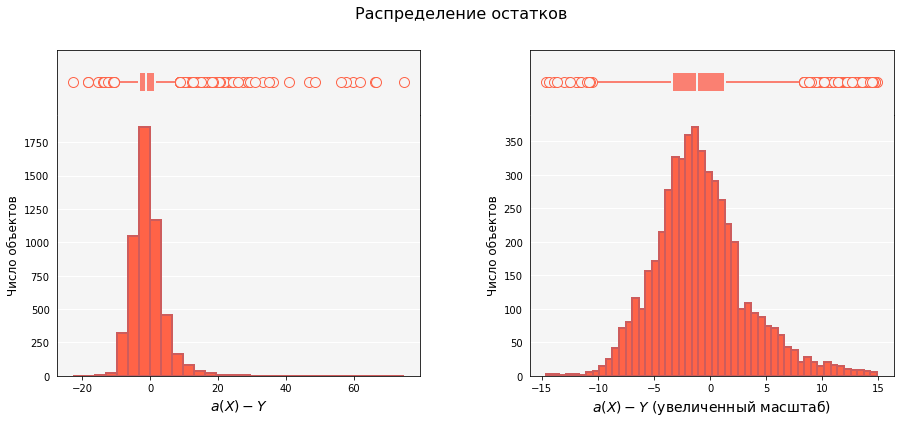

delta
min  -22.717
mean  -0.501
50%   -1.135
max   74.811

In [77]:
plot_distribution(
    [resid['delta'], resid[resid['delta'].abs() < 15]['delta']], bins=[30,50], 
    title='Распределение остатков', xlabels=['$a(X) - Y$', '$a(X) - Y$ (увеличенный масштаб)'], 
)
resid['delta'].describe().to_frame().loc[['min', 'mean', '50%', 'max']]

Остатки получились немного смещённые: модель в среднем занижает recovery. Распределение также немного скошено влево, у него длинный правый хвост. На некоторых объектах модель завысила recovery более, чем на 60%.

### Вывод<a class="tocSkip">

Таким образом, наименьшего sMAPE удалось достичь, обучая случайный лес на выборке, очищенной от объектов с пропусками. Модель вменяема: её качество лучше, чем у константной модели. Однако значительного отрыва в качестве от константной модели добиться не удалось.

# Предсказание эффективности обогащения финального концентрата 
[к оглавлению](#start)

Перейдём ко второй части проекта — предсказанию финальной $recovery$.

При обучении второй модели будем использовать признаки типа `input` и `state` на всех этапах обогащения от флотации до вторичной очистки. Кроме того, можно добавить в  выборку признак `rougher.output.recovery`, предсказанный предыдущей моделью. Вероятно, он окажется значимым при обучении модели.

Сначала подготовим выборку. Добавим в датафрэйм предсказанную эффективность флотации (столбец `rougher.output.recovery_predicted`) и удалим пропуски, которые были в `data_rougher` на предыдущем этапе (т.к. предыдущая модель обучалась на очищенных данных).

In [78]:
pred_train_rougher = pd.Series(pipeline.predict(x_train), index=x_train.index)

In [79]:
data_final = data.loc[data_rougher.index].copy()
data_final['rougher.output.recovery_predicted'] = pred_train_rougher
print(len(data_final), 'объекта в обучающей выборке')

13964 объекта в обучающей выборке


В тестовую выборку добавим таргет `final.output.recovery` и предсказанную `rougher.output.recovery_predicted`. Как и в предыдущем случае, удалим строки с нулевым или пропущенным таргетом.

In [80]:
data_test_final = pd.concat([
    data_test.loc[y_test.index],
    pd.DataFrame(pred_rougher, index=y_test.index, columns=['rougher.output.recovery_predicted']),
    data_full.loc[y_test.index]['final.output.recovery']
], axis=1)

In [81]:
data_test_final = data_test_final[data_test_final['final.output.recovery'] > 0]
print(len(data_test_final), 'объектов в тестовой выборке')

5154 объектов в тестовой выборке


## Предобработка
[к оглавлению](#start)

Перейдём к предобработке. Порядок действий будет такой же.

In [82]:
print('Число дубликатов:', data_final.duplicated().sum())

Число дубликатов: 0


### Целевой признак<a class="tocSkip">

Удалим объекты с неизвестным таргетом и построим гистограмму.

In [83]:
n = len(data_final)
data_final = data_final[~data_final['final.output.recovery'].isna()]
print('Удалили {} строк или {:.2%}'.format(n - len(data_final), (n - len(data_final)) / n))

Удалили 115 строк или 0.82%


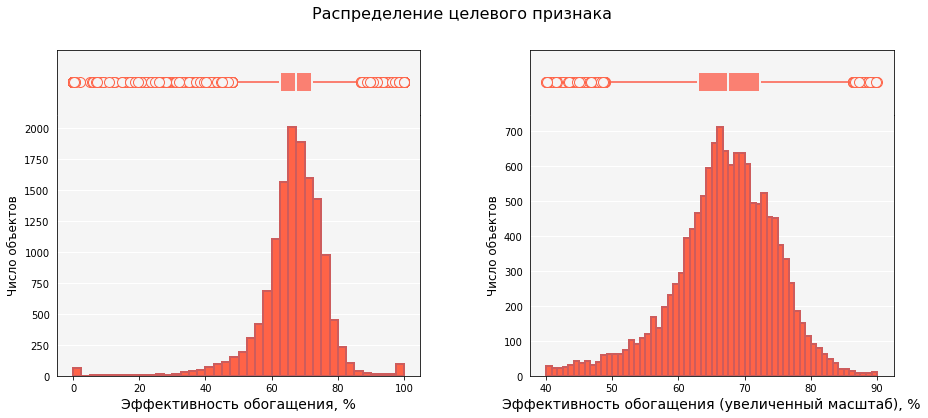

final.output.recovery
min                   0.000
50%                  67.446
mean                 66.555
max                 100.000

In [84]:
plot_distribution(
    [data_final['final.output.recovery'], data_final[(data_final['final.output.recovery'] > 40) & (data_final['final.output.recovery'] < 90)]['final.output.recovery']], 
    xlabels=['Эффективность обогащения, %', 'Эффективность обогащения (увеличенный масштаб), %'], 
    title='Распределение целевого признака', bins=[40, 60]
)
data_final['final.output.recovery'].describe().loc[['min','50%','mean','max']].to_frame()

Распределение финальной recovery очень похоже на распределение флотационной: унимодальное и скошенное вправо. Среднее значение recovery здесь меньше, всего 67%. 

Также на гистограмме есть пики в нуле и 100%. Изучим эти объекты.

In [85]:
print('Содержание золота\n\tв сырье: {:.1f}%\n\tпосле обогащения: {:.1f}%\n\tв хвосте: {:.1f}%'.format(
    data_final[data_final['final.output.recovery'] == 0]['rougher.input.feed_au'].mean(),
    data_final[data_final['final.output.recovery'] == 0]['final.output.concentrate_au'].mean(),
    data_final[data_final['final.output.recovery'] == 0]['final.output.tail_au'].mean()
))

Содержание золота
	в сырье: 7.8%
	после обогащения: 0.0%
	в хвосте: 3.1%


In [86]:
print('Содержание золота\n\tв сырье: {:.1f}%\n\tпосле обогащения: {:.1f}%\n\tв хвосте: {:.1f}%'.format(
    data_final[data_final['final.output.recovery'] == 100]['rougher.input.feed_au'].mean(),
    data_final[data_final['final.output.recovery'] == 100]['final.output.concentrate_au'].mean(),
    data_final[data_final['final.output.recovery'] == 100]['final.output.tail_au'].mean()
))

Содержание золота
	в сырье: 7.7%
	после обогащения: 40.5%
	в хвосте: 0.0%


В строках с нулевым таргетом видим ненулевые начальные концентрации золота и нулевые конечные. В строках с максимальным таргетом концентрация золота в отвальном хвосте нулевая. Удалим объекты из выборки.

In [87]:
n = len(data_final)
data_final = data_final[(data_final['final.output.recovery']!=0) & (data_final['final.output.recovery']!=100)]
print('Удалили {} объект'.format(n - len(data_final)))

Удалили 131 объект


Перейдём к предобработке остальных признаков. Данные об этапе `rougher` уже предобработаны, поэтому эти столбцы не будем рассматривать.

### Параметры сырья<a class="tocSkip">

К этим параметрам относятся информация о флотационных реагентах на этапе очистки и размер гранул сырья.

In [88]:
input_columns = [col  for col in data_final.columns if ('input' in col) and ('rougher' not in col)]
data_final[input_columns].describe().loc[['min', 'mean', '50%', 'max', 'count']].T

min    mean     50%     max     count
primary_cleaner.input.sulfate    0.003 133.852 133.456 250.128 13713.000
primary_cleaner.input.depressant 0.000   8.866   8.033  20.052 13705.000
primary_cleaner.input.feed_size  1.080   7.324   7.300  10.470 13718.000
primary_cleaner.input.xanthate   0.000   0.887   0.888   2.513 13633.000

В столбце `primary_cleaner.input.sulfate` значения превышают 100 — похоже, это не концентрация. Построим гистограммы.

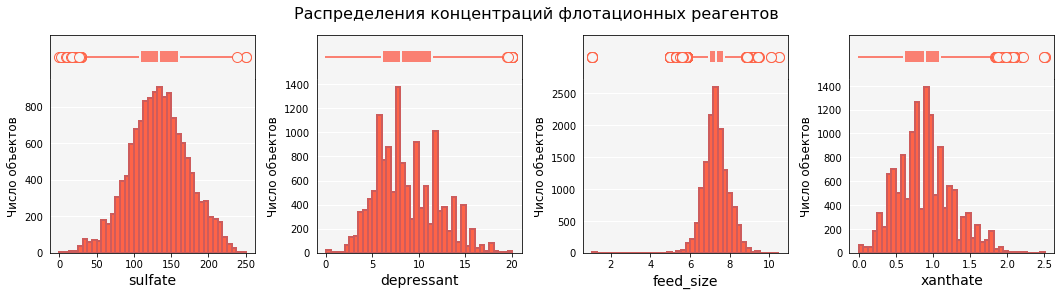

In [89]:
plot_distribution(
    [data_final[col] for col in input_columns[:4]], xlabels=[s.split('.')[-1] for s in input_columns[:4]],
    bins=[40]*4, figsize=(18,4), title='Распределения концентраций флотационных реагентов'
)

Распределения выглядят вполне адекватно. Видим, что на гистограмме feed_size не осталось тяжёлого хвоста, т.е. на этапе флотации все гранулы были 'приведены' к одним размерам.

Перейдём к пропускам.

In [90]:
pd.DataFrame(data_final[input_columns].isna().sum(), columns=['Число пропусков'])

Число пропусков
primary_cleaner.input.sulfate                   5
primary_cleaner.input.depressant               13
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                 85

Пропусков немного. Способы обработки будут теми же, что равнее: удаление/заполнение средним/медианой. Проверим, можно ли запонять пропуски предыдущим значением.

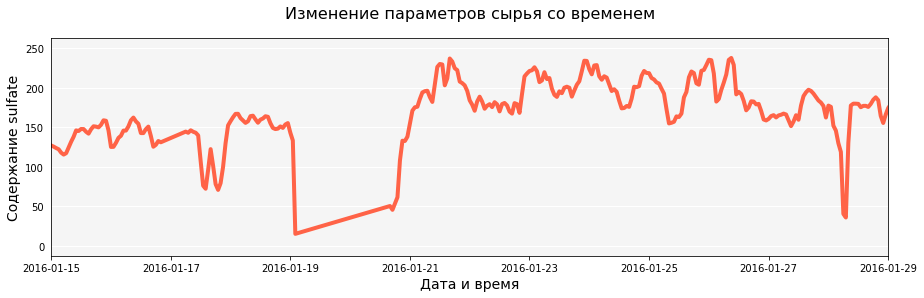

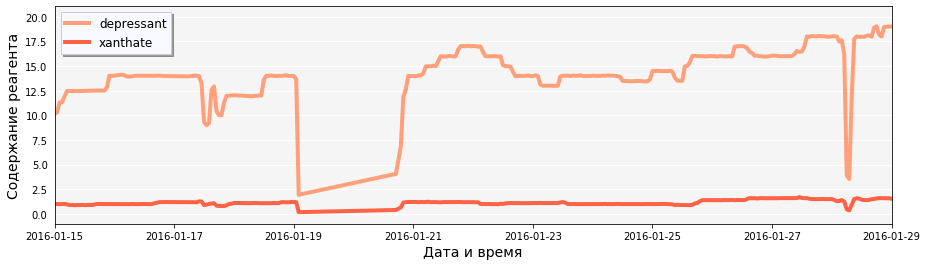

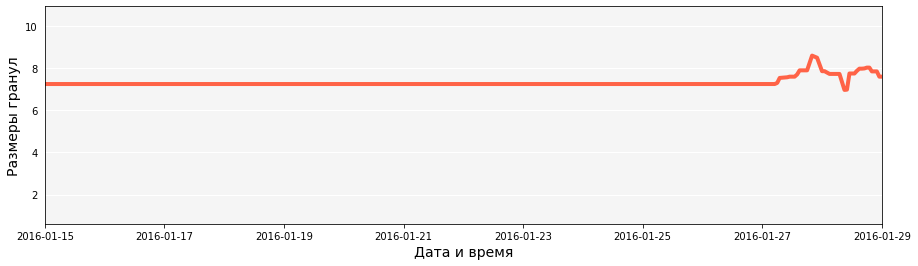

In [91]:
plot_lines(
    data_final.index, data_final['primary_cleaner.input.sulfate'], 'Дата и время', 
    'Содержание sulfate', xlim=xlim, title='Изменение параметров сырья со временем'
)
plot_lines(
    data_final.index, [data_final[input_columns[i]] for i in [1,3]], 'Дата и время', 
    'Содержание реагента', xlim=xlim, labels=[input_columns[i].split('.')[-1] for i in [1,3]],
)
plot_lines(
    data_final.index, data_final['primary_cleaner.input.feed_size'], 'Дата и время', 'Размеры гранул', xlim=xlim
)

Можно :)

### Параметры, характеризующие текущее состояние этапа<a class="tocSkip">

К этим параметрам относится объём воздуха и уровень жидкости на четырёх этапах первичной очистки $a-d$ и девяти этапах вторичной $1\_a - 5\_a, 1\_b-4\_b$.

In [92]:
air_columns = [col  for col in data_final.columns if ('air' in col) and ('rougher' not in col)]
level_columns = [col  for col in data_final.columns if ('level' in col) and ('rougher' not in col)]
state_columns = air_columns + level_columns
data_final[state_columns].describe().loc[['min', 'mean', '50%', 'max', 'count']].T

min     mean      50%  \
primary_cleaner.state.floatbank8_a_air        0.006 1607.740 1601.827   
primary_cleaner.state.floatbank8_b_air        0.009 1608.264 1601.819   
primary_cleaner.state.floatbank8_c_air        0.015 1608.583 1601.564   
primary_cleaner.state.floatbank8_d_air        0.009 1540.129 1600.077   
secondary_cleaner.state.floatbank2_a_air      0.078   29.673   30.032   
secondary_cleaner.state.floatbank2_b_air      0.000   24.950   27.035   
secondary_cleaner.state.floatbank3_a_air      0.000   29.267   28.017   
secondary_cleaner.state.floatbank3_b_air      0.000   22.685   22.053   
secondary_cleaner.state.floatbank4_a_air      0.000   20.019   20.004   
secondary_cleaner.state.floatbank4_b_air      0.000   15.513   14.978   
secondary_cleaner.state.floatbank5_a_air     -0.372   16.824   17.950   
secondary_cleaner.state.floatbank5_b_air      0.668   13.101   12.002   
secondary_cleaner.state.floatbank6_a_air      0.195   19.661   19.987   
primary_cleaner.state.floatbank8_a_level   -633.597 -488.331 -499.908   
primary_cleaner.state.floatbank8_b_level   -740.122 -488.925 -499.934   
primary_cleaner.state.floatbank8_c_level   -799.002 -489.085 -499.865   
primary_cleaner.state.floatbank8_d_level   -799.789 -483.230 -499.829   
secondary_cleaner.state.floatbank2_a_level -799.606 -501.738 -499.957   
secondary_cleaner.state.floatbank2_b_level -799.874 -503.029 -500.010   
secondary_cleaner.state.floatbank3_a_level -799.613 -478.081 -499.878   
secondary_cleaner.state.floatbank3_b_level -759.177 -488.633 -499.965   
secondary_cleaner.state.floatbank4_a_level -799.707 -478.544 -499.681   
secondary_cleaner.state.floatbank4_b_level -799.861 -460.593 -499.412   
secondary_cleaner.state.floatbank5_a_level -797.142 -483.820 -499.703   
secondary_cleaner.state.floatbank5_b_level -800.006 -483.831 -499.916   
secondary_cleaner.state.floatbank6_a_level -809.393 -506.807 -500.062   

                                                max     count  
primary_cleaner.state.floatbank8_a_air     2079.531 13717.000  
primary_cleaner.state.floatbank8_b_air     1900.007 13717.000  
primary_cleaner.state.floatbank8_c_air     2013.156 13717.000  
primary_cleaner.state.floatbank8_d_air     2398.888 13716.000  
secondary_cleaner.state.floatbank2_a_air     52.651 13508.000  
secondary_cleaner.state.floatbank2_b_air     35.152 13712.000  
secondary_cleaner.state.floatbank3_a_air     44.260 13715.000  
secondary_cleaner.state.floatbank3_b_air     35.073 13718.000  
secondary_cleaner.state.floatbank4_a_air     30.116 13715.000  
secondary_cleaner.state.floatbank4_b_air     24.008 13718.000  
secondary_cleaner.state.floatbank5_a_air     43.710 13718.000  
secondary_cleaner.state.floatbank5_b_air     27.926 13718.000  
secondary_cleaner.state.floatbank6_a_air     32.189 13718.000  
primary_cleaner.state.floatbank8_a_level   -330.134 13718.000  
primary_cleaner.state.floatbank8_b_level   -347.354 13718.000  
primary_cleaner.state.floatbank8_c_level   -346.653 13718.000  
primary_cleaner.state.floatbank8_d_level    -30.602 13718.000  
secondary_cleaner.state.floatbank2_a_level -127.876 13718.000  
secondary_cleaner.state.floatbank2_b_level -212.065 13718.000  
secondary_cleaner.state.floatbank3_a_level -191.679 13718.000  
secondary_cleaner.state.floatbank3_b_level -159.742 13718.000  
secondary_cleaner.state.floatbank4_a_level -245.239 13718.000  
secondary_cleaner.state.floatbank4_b_level -145.071 13718.000  
secondary_cleaner.state.floatbank5_a_level -275.073 13718.000  
secondary_cleaner.state.floatbank5_b_level -181.733 13718.000  
secondary_cleaner.state.floatbank6_a_level -104.427 13718.000

Удалим строки с отрицательным объёмом воздуха в столбце `secondary_cleaner.state.floatbank5_a_air`.

In [93]:
n = len(data_final)
data_final = data_final[data_final['secondary_cleaner.state.floatbank5_a_air'] > 0]
print('Удалили {} строки'.format(n - len(data_final)))

Удалили 22 строки


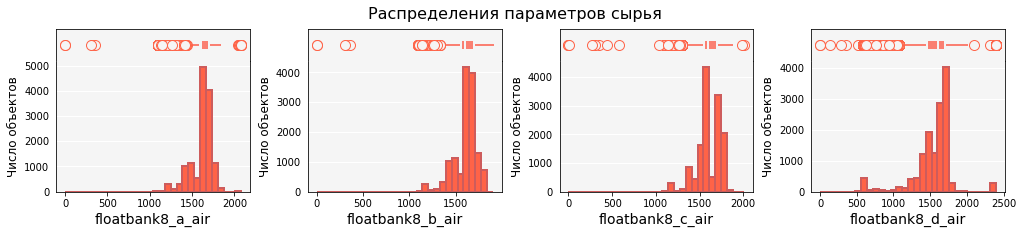

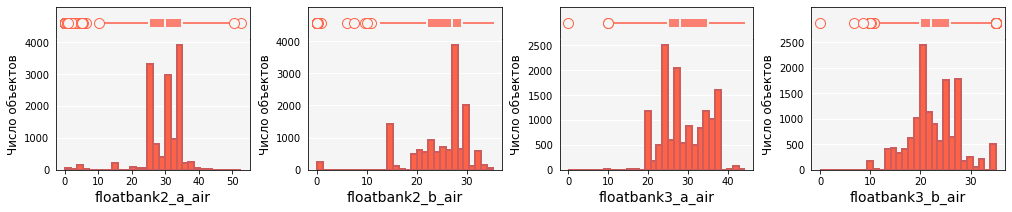

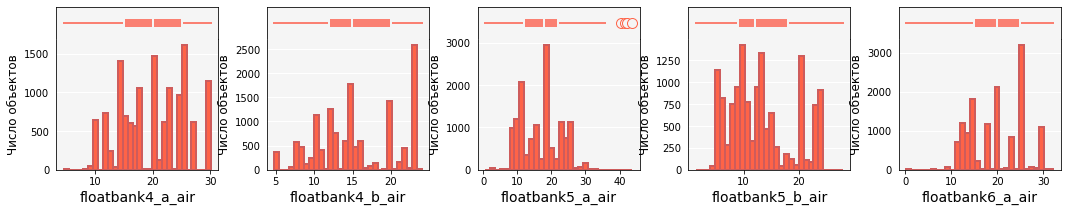

In [94]:
for i in range(2):
    plot_distribution(
        [data_final[col] for col in air_columns[i*4:(i+1)*4]], title='Распределения параметров сырья' * (i==0),
        xlabels=[s.split('.')[-1] for s in air_columns[i*4:(i+1)*4]], bins=[30]*4, figsize=(17, 3)
    )
plot_distribution(
    [data_final[col] for col in air_columns[-5:]], xlabels=[s.split('.')[-1] for s in air_columns[-5:]],
     bins=[30]*5, figsize=(18, 3)
)

Распределения очень похожи на предыдущие. Каких-то аномалий не видно.

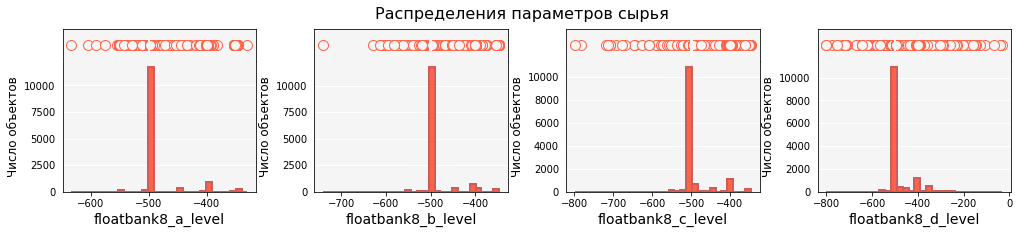

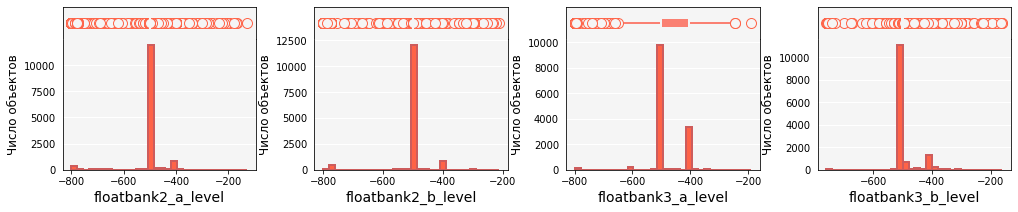

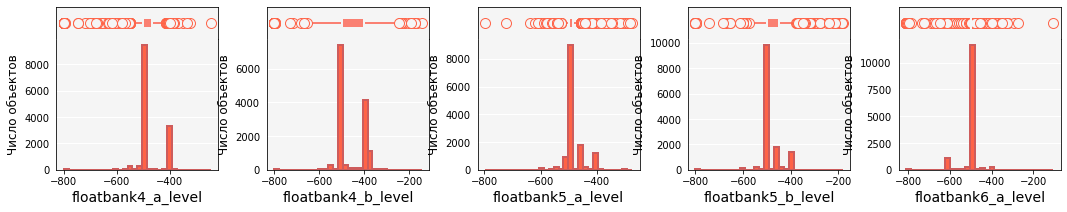

In [95]:
for i in range(2):
    plot_distribution(
        [data_final[col] for col in level_columns[i*4:(i+1)*4]], title='Распределения параметров сырья' * (i==0),
        xlabels=[s.split('.')[-1] for s in level_columns[i*4:(i+1)*4]], bins=[30]*4, figsize=(17, 3)
    )
plot_distribution(
    [data_final[col] for col in level_columns[-5:]], xlabels=[s.split('.')[-1] for s in level_columns[-5:]],
     bins=[30]*5, figsize=(18, 3)
)

В отличие от предыдущих распределений, на которых было по три пика около -300, -400 и -500, здесь в большинстве случаев уровень жидкости равен -500.

Перейдём к пропускам.

In [96]:
pd.DataFrame(data_final[state_columns].isna().sum(), columns=['Число пропусков'])

Число пропусков
primary_cleaner.state.floatbank8_a_air                    1
primary_cleaner.state.floatbank8_b_air                    1
primary_cleaner.state.floatbank8_c_air                    1
primary_cleaner.state.floatbank8_d_air                    2
secondary_cleaner.state.floatbank2_a_air                210
secondary_cleaner.state.floatbank2_b_air                  6
secondary_cleaner.state.floatbank3_a_air                  3
secondary_cleaner.state.floatbank3_b_air                  0
secondary_cleaner.state.floatbank4_a_air                  3
secondary_cleaner.state.floatbank4_b_air                  0
secondary_cleaner.state.floatbank5_a_air                  0
secondary_cleaner.state.floatbank5_b_air                  0
secondary_cleaner.state.floatbank6_a_air                  0
primary_cleaner.state.floatbank8_a_level                  0
primary_cleaner.state.floatbank8_b_level                  0
primary_cleaner.state.floatbank8_c_level                  0
primary_cleaner.state.floatbank8_d_level                  0
secondary_cleaner.state.floatbank2_a_level                0
secondary_cleaner.state.floatbank2_b_level                0
secondary_cleaner.state.floatbank3_a_level                0
secondary_cleaner.state.floatbank3_b_level                0
secondary_cleaner.state.floatbank4_a_level                0
secondary_cleaner.state.floatbank4_b_level                0
secondary_cleaner.state.floatbank5_a_level                0
secondary_cleaner.state.floatbank5_b_level                0
secondary_cleaner.state.floatbank6_a_level                0

В столбце `secondary_cleaner.state.floatbank2_a_air` относительно много пропусков.

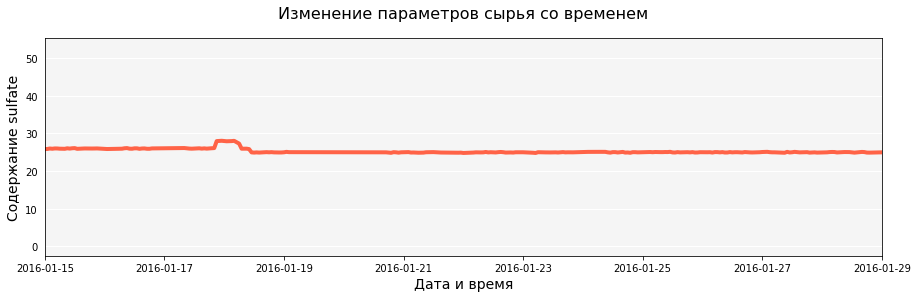

In [97]:
plot_lines(
    data_final.index, data_final['secondary_cleaner.state.floatbank2_a_air'], 'Дата и время', 
    'Содержание sulfate', xlim=xlim, title='Изменение параметров сырья со временем'
)

Способы заполнения будут такими же.

### Вывод<a class="tocSkip">

Предобработка завершена.
* Изучены распределения признаков. Удалены артефакты, обработаны выбросы.
* Проанализированы способы заполнения пропусков.

## Анализ данных
[к оглавлению](#start)

Посмотрим, как менялась концентрация металлов на разных этапах обогащения руды.

In [98]:
stages = ['rougher.input.feed', 'rougher.output.concentrate', 
          'primary_cleaner.output.concentrate', 'final.output.concentrate']
concentration_columns = [
    [(stage + '_' + metal) for stage in stages] for metal in ['au', 'ag', 'pb', 'sol']] 
concentration_columns = pd.DataFrame(concentration_columns, index=['au', 'ag', 'pb', 'sol'],
                                     columns=['input', 'rougher', 'primary_cleaner', 'final']).T
df = pd.DataFrame(
    [list(data_final[concentration_columns.iloc[i]].median()) for i in range(4)],
    index=['Сырьё', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат'], 
    columns=concentration_columns.columns
)

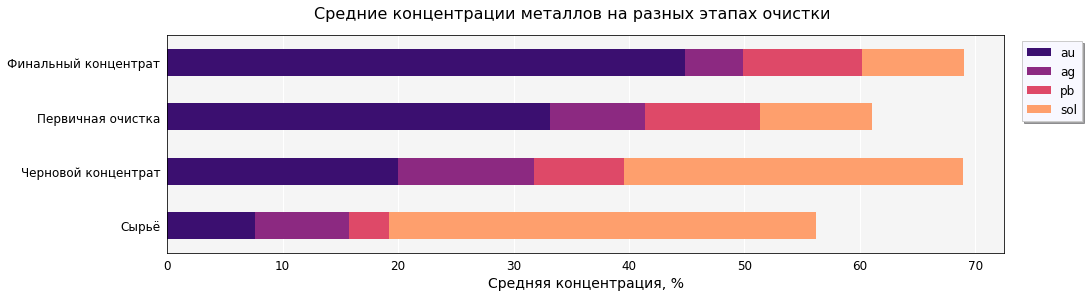

In [99]:
plot_bar(df, 'Средние концентрации металлов на разных этапах очистки', 'Средняя концентрация, %')

По мере очистки руды средняя концентрация золота увеличивается, однако даже в финальном концентрате доля золота составляет менее 50%.

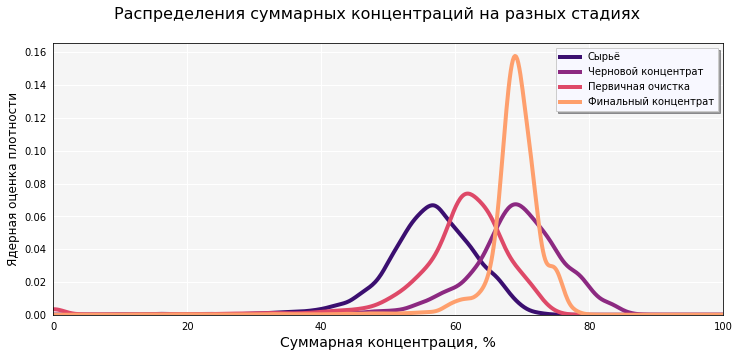

In [100]:
plot_kde(
    [data_final[concentration_columns.iloc[i]].sum(axis=1) for i in range(4)], 'Суммарная концентрация, %', 
    labels=['Сырьё', 'Черновой концентрат', 'Первичная очистка', 'Финальный концентрат'], xlim=(0,100), 
    title='Распределения суммарных концентраций на разных стадиях'
    
)

Суммарных концентраций более 100% в выборке нет :) Кроме того, в финальном концентрате разброс суммарных концентраций оказался меньше, а среднее значение больше. Возможно, это объясняется тем, что концентрации других компонентов руды (информации о которых у нас нет) в финальном концентрате меньше, чем в сырье/черновом концентрате.
___

Построим корреляционную матрицу.

In [101]:
rougher_columns = list(data_rougher.columns)
rougher_columns.remove('rougher.output.recovery')
final_columns = rougher_columns + input_columns + state_columns + \
                ['rougher.output.recovery_predicted', 'final.output.recovery']

In [102]:
data_final = data_final[final_columns]
data_test_final = data_test_final[final_columns]

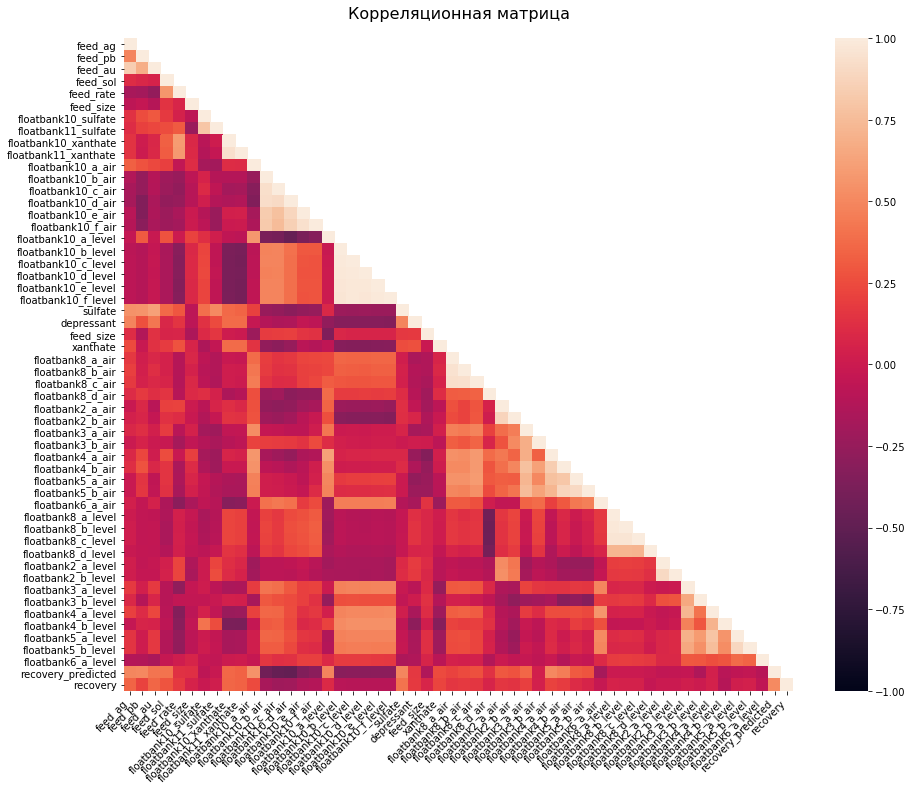

In [103]:
plot_corr_matrix(
    data_final.corr(), annot=False, labels=[col.split('.')[-1] for col in data_final.columns], figsize=(15,12)
)

In [104]:
data_final.corr()[data_final.corr()['final.output.recovery'].abs()>0.3]['final.output.recovery']

rougher.input.feed_ag                0.351
rougher.input.feed_au                0.355
rougher.input.floatbank10_xanthate   0.353
rougher.input.floatbank11_xanthate   0.336
primary_cleaner.input.sulfate        0.414
rougher.output.recovery_predicted    0.513
final.output.recovery                1.000
Name: final.output.recovery, dtype: float64

Наблюдаются те же особенности, что и в предыдущем случае: 
* объёмы воздуха на различных этапах очистки ($a-d$ на первичной и $a-b$ на вторичной) сильно скоррелированы;
* уровни жидкости на различных этапах очистки практически линейно зависимы.

Кроме того, имеется сильная коррелляция между уровнями жидкости/объёмами воздуха на стадиях флотации и первичной/вторичной очистки. 

Из нижней строки видим, что многие признаки скоррелированы с таргетом. Наибольшая корреляция наблюдается с признаками:
* флотация — концентрации металлов в сырье, содержание ксантогената, предсказанная эффективность флотации
* первичная очистка — содержание сульфида натрия
* вторичная очистка — нет

Наибольшая корреляция таргета наблюдается с эффективностью флотации. Посмотрим на *scatter-plot*.

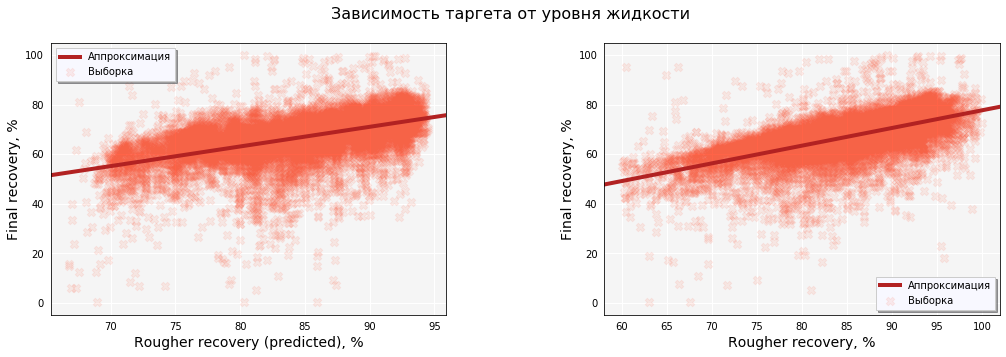

In [105]:
plot_scatter(
    [data_final[['rougher.output.recovery_predicted', 'final.output.recovery']],
     data.loc[data_final.index][data['rougher.output.recovery'] > 60][['rougher.output.recovery','final.output.recovery']]], 
    xlabels=['Rougher recovery (predicted), %', 'Rougher recovery, %'], ylabels=['Final recovery, %'] * 3, 
    title='Зависимость таргета от уровня жидкости', figsize=(17,5)
)

Из графика видно, что взаимосвязь окололинейна. Эффективность флотации определённо нужно учитывать при обучении второй модели :)  

Диаграмма рассеяния для реальных значений эффективности флотации (график справа) визуально очень похожа на диаграмму для предсказанных значений (слева). Разброс значений около аппроксимирующей прямой меньше, однако уравнение прямой практически идентично. Это подтверждает вменяемость модели :)

Осталось довольно много признаков. Построим диаграммы рассеяния.

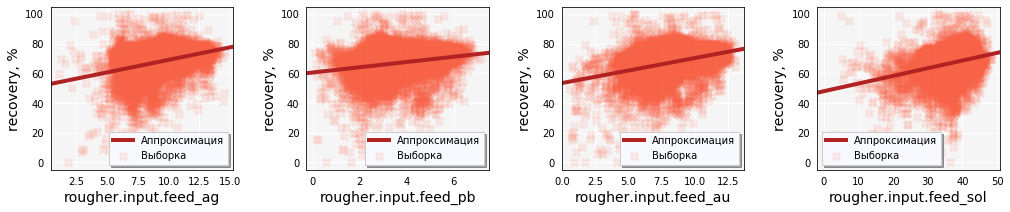

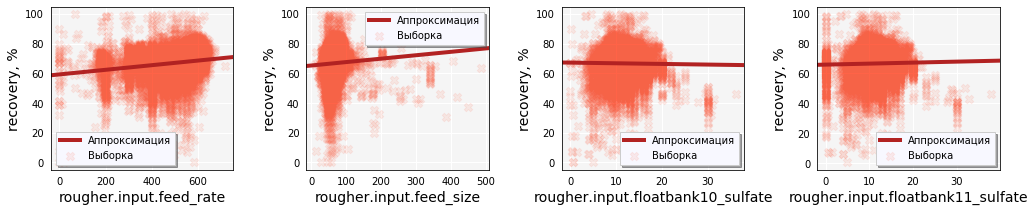

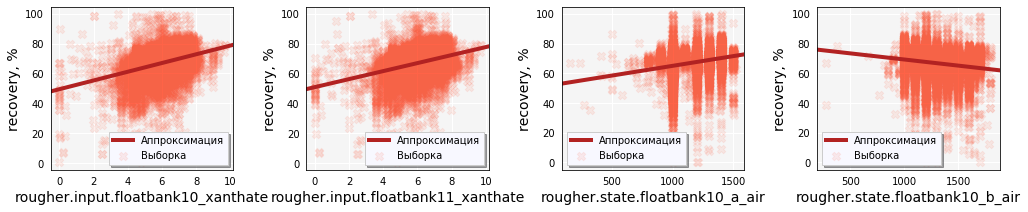

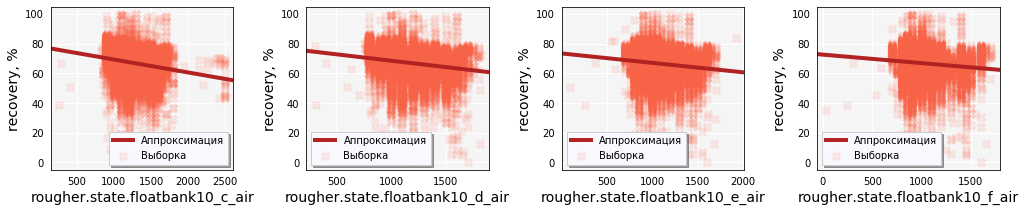

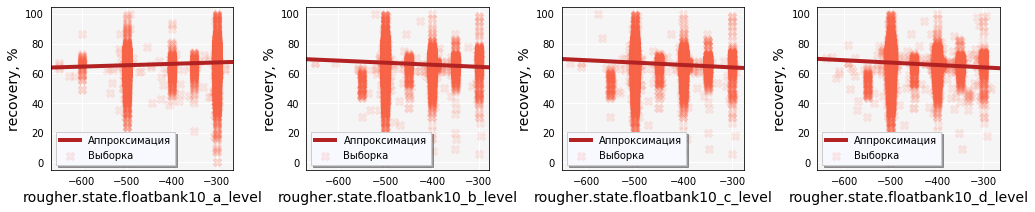

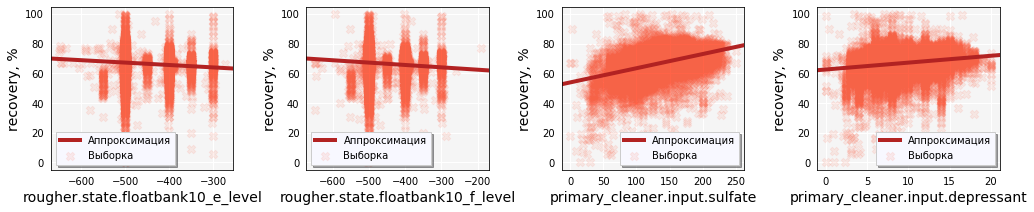

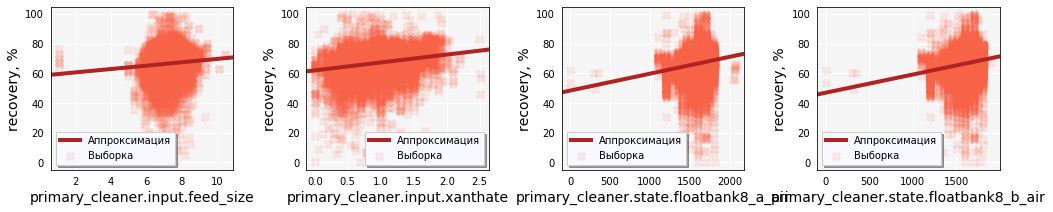

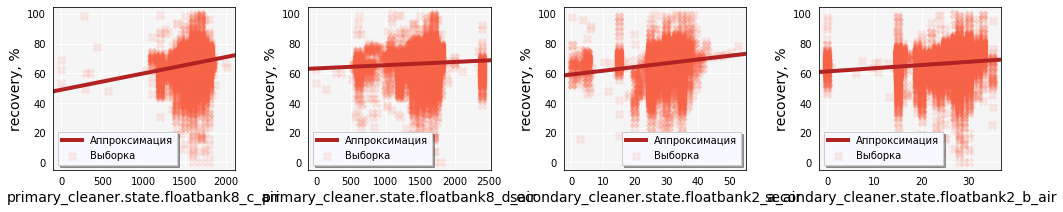

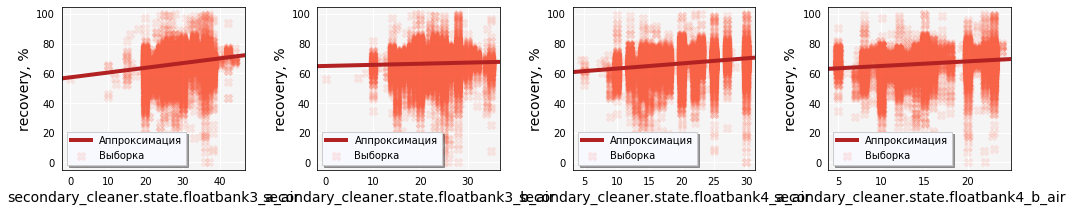

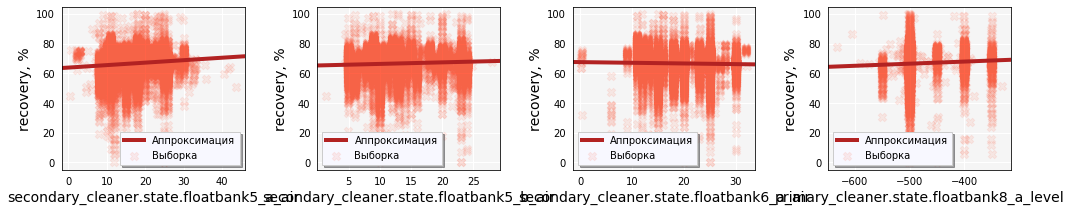

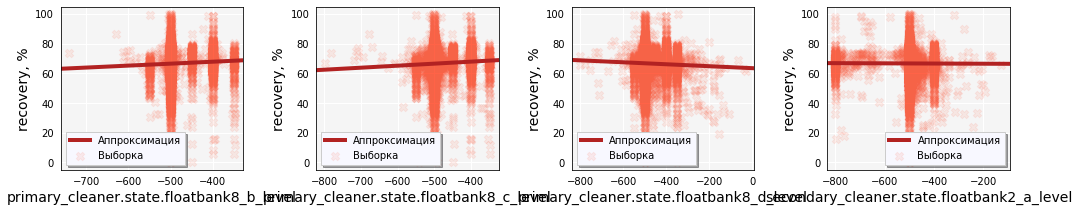

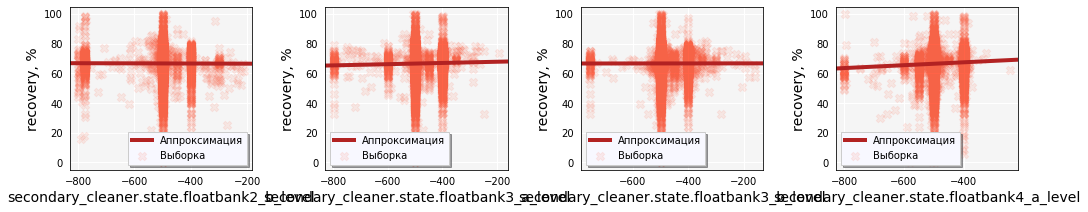

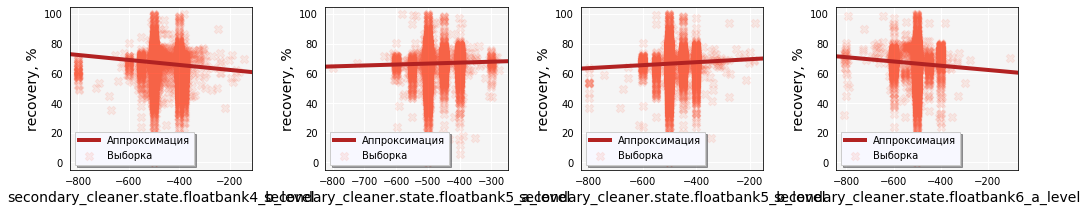

In [106]:
for i in range(13):
    cols = data_final.columns[i*4: (i+1)*4]
    plot_scatter(
        [data_final[[col, 'final.output.recovery']] for col in cols], xlabels=cols, 
        ylabels=['recovery, %'] * 4, figsize=(17,3)
    )

Из графиков видим, что на эффективность обогащения очень сильно влияет сырьё (т.е. концентрации металлов в руде). Технические параметры, характеризующие процесс очистки, влияют в меньшей степени. Тем не менее, можем выделить несколько значимых признаков: содержание ксантогената и объём воздуха на этапе флотации, а также содержание $Na_2S$ на этапе первичной очистки. Параметры вторичной очистки практически не влияют на таргет.

### Вывод<a class="tocSkip">

Анализ данных показал:
* Средняя концентрация золота увеличиватся по мере обогащения руды. На распределениях суммарных концентраций металлов на разных этапах обогащения аномалий не обнаружено.

Анализ корреляционной матрицы и диаграмм рассеяния показал:
* Многие признаки в выборке линейно зависимы.
* Наиболее сильная взаимосвязь с таргетом наблюдается у эффективности флотации.

## Обучение модели 
[к оглавлению](#start)

Итак, в выборке 54 признака, метрика качества — sMAPE.

### Качество константной модели<a class="tocSkip">

In [107]:
x_train = data_final.drop(columns=['final.output.recovery'])
y_train = data_final['final.output.recovery']
x_test = data_test_final.drop(columns=['final.output.recovery'])
y_test = data_test_final['final.output.recovery']
print('{} объектов в обучении и {} в тесте'.format(len(x_train), len(x_test)))

13696 объектов в обучении и 5154 в тесте


Объёмы выборок практически не изменились.

In [108]:
pred_constant_final = pd.Series([y_test.median()] * len(y_test), index=y_test.index)
scores.loc[('Финальный', 'Константная модель', '—'),] = get_scores(y_test, pred_constant_final)
scores

sMAPE  RMSE   MAE     R2
Этап      Модель             Пропуски                         
Флотация  Константная модель —        4.556 6.331 3.770 -0.021
          Случайный лес      drop     4.294 5.333 3.525  0.275
Финальный Константная модель —        7.576 7.412 5.088 -0.014

Здесь константная модель даёт худший результат.

In [109]:
preprocessor = Pipeline(steps=[
    ('imputer', MyImputer(strategy='ffill')),
    ('num_poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())
])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', None)
])

Пайплайн такой же, как ранее.

### Линейная регрессия

Подберём оптимальные гиперпараметры.

```python
gs = GridSearch(pipeline, parameters_grid_lr, dropna=False)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 8.497
```

In [110]:
params_lr = {
    'preprocessor__imputer': MyImputer(strategy='ffill'),
    'preprocessor__num_poly__degree': 1,
    'preprocessor__scaler': StandardScaler(),
    'model': Lasso(alpha=1., random_state=42),
}

In [111]:
cv_scores = cv_scores.copy()
pred_constant = pd.Series([y_train.median()] * len(y_train), index=y_train.index)
cv_scores.loc[('Финальный', 'Константная модель', '—'),] = get_scores(y_train, pred_constant)

In [112]:
pipeline.set_params(**params_lr)
cv_scores.loc[('Финальный', 'Линейная регрессия', 'ffill'),] = cv_score(x_train, y_train, pipeline, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180

В этот раз удалось сразу превзойти константную модель :) Попробуем удалить объекты с пропусками.

```python
gs = GridSearch(pipeline, parameters_grid_lr, dropna=True)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 8.623
```

In [113]:
params_lr2 = params_lr

In [114]:
pipeline.set_params(**params_lr2)
cv_scores.loc[('Финальный', 'Линейная регрессия', 'drop'),] = cv_score(x_train, y_train, pipeline, dropna=True, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180
                              drop      8.623 7.897 5.446  0.163

Качество немного ухудшилось.

### Случайный лес

Есть надежда, что в этот раз случайный лес снова покажет лучшее качество.

```python
pipeline.set_params(
    preprocessor__num_poly = None,
    preprocessor__scaler = None,
    preprocessor__imputer = MyImputer(strategy='ffill'),
    model = RandomForestRegressor(random_state=42, n_estimators=100)
)
gs = GridSearch(pipeline, parameters_grid_rf, dropna=False)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 9.483 (30 0.4 20 med)
```

In [115]:
params_rf = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='median'),
    'model': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=30, 
                                   min_samples_leaf=20, max_features=0.4)
}

In [116]:
pipeline.set_params(**params_rf)
cv_scores.loc[('Финальный', 'Случайный лес', 'median'),] = cv_score(x_train, y_train, pipeline, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180
                              drop      8.623 7.897 5.446  0.163
          Случайный лес       median    9.483 8.154 6.022  0.107

Не показал :(

```python
gs = GridSearch(pipeline, parameters_grid_rf, dropna=True)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 9.595
```

In [117]:
params_rf2 = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='mean'),
    'model': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5, 
                                   min_samples_leaf=10, max_features=0.4)
}

In [118]:
pipeline.set_params(**params_rf2)
cv_scores.loc[('Финальный', 'Случайный лес', 'drop'),] = cv_score(x_train, y_train, pipeline, dropna=True, gs=False)
cv_scores

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180
                              drop      8.623 7.897 5.446  0.163
          Случайный лес       median    9.483 8.154 6.022  0.107
                              drop      9.595 8.315 6.095  0.071

Видим, что линейная модель в этой задаче показывает значительно лучшее качество.  
Попробуем на всякий случай ещё обучить градиентный бустинг.

### Градиентный бустинг

```python
pipeline.set_params(
    preprocessor__num_poly = None,
    preprocessor__scaler = None,
    preprocessor__imputer = MyImputer(strategy='ffill'),
    model = LGBMRegressor(random_state=42, verbose=None)
)
gs = GridSearch(pipeline, parameters_grid_gb, dropna=False)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 9.538
```

In [119]:
params_gb = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='median'),
    'model': LGBMRegressor(random_state=42, verbose=None, max_depth=10,
                           n_estimators=200, learning_rate=0.01)
}

In [120]:
pipeline.set_params(**params_gb)
cv_scores.loc[('Финальный', 'Градиентный бустинг', 'median'),] = cv_score(x_train, y_train, pipeline, gs=False)
cv_scores

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13515
[LightGBM] [Info] Number of data points in the train set: 9131, number of used features: 53
[LightGBM] [Info] Start training from score 67.590909
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007411 seconds.
You can set `force_col_wise

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180
                              drop      8.623 7.897 5.446  0.163
          Случайный лес       median    9.483 8.154 6.022  0.107
                              drop      9.595 8.315 6.095  0.071
          Градиентный бустинг median    9.538 8.238 6.057  0.088

```python
gs = GridSearch(pipeline, parameters_grid_gb, dropna=True)
gs.fit(x_train, y_train)
print('sMAPE (кросс-валидация): {:.3f}'.format(gs.best_score))
```
```
sMAPE (кросс-валидация): 9.773
```

In [121]:
params_gb2 = {
    'preprocessor__num_poly': None,
    'preprocessor__scaler': None,
    'preprocessor__imputer': MyImputer(strategy='ffill'),
    'model': LGBMRegressor(random_state=42, verbose=None, max_depth=10,
                           n_estimators=200, learning_rate=0.01)
}

In [122]:
pipeline.set_params(**params_gb2)
cv_scores.loc[('Финальный', 'Градиентный бустинг', 'drop'),] = cv_score(x_train, y_train, pipeline, dropna=True, gs=False)
cv_scores

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13515
[LightGBM] [Info] Number of data points in the train set: 7986, number of used features: 53
[LightGBM] [Info] Start training from score 67.843906
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006647 seconds.
You can set `force_col_wise

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180
                              drop      8.623 7.897 5.446  0.163
          Случайный лес       median    9.483 8.154 6.022  0.107
                              drop      9.595 8.315 6.095  0.071
          Градиентный бустинг median    9.538 8.238 6.057  0.088
                              drop      9.773 8.388 6.210  0.053

Обе модели показали качество, сравнимое со случайным лесом.

### Сравнительный анализ
Выберем лучшую модель.

In [123]:
cv_scores

sMAPE  RMSE   MAE     R2
Этап      Модель              Пропуски                          
Флотация  Константная модель  —         7.615 8.681 6.182 -0.018
          Линейная регрессия  ffill     7.775 8.339 6.264 -0.283
                              drop      7.858 8.441 6.335 -0.317
          Случайный лес       ffill     7.907 8.355 6.379 -0.297
                              drop      7.680 8.286 6.209 -0.258
          Градиентный бустинг ffill     8.322 8.824 6.707 -0.436
                              drop      8.103 8.579 6.562 -0.347
Финальный Константная модель  —        10.023 9.064 6.402 -0.008
          Линейная регрессия  ffill     8.497 7.817 5.358  0.180
                              drop      8.623 7.897 5.446  0.163
          Случайный лес       median    9.483 8.154 6.022  0.107
                              drop      9.595 8.315 6.095  0.071
          Градиентный бустинг median    9.538 8.238 6.057  0.088
                              drop      9.773 8.388 6.210  0.053

В данном случае линейная модель, обученная на данных с заполненными пропусками, показала самое высокое качество. К тому, же нам удалось обойти константную модель :)

Оценим теперь качество на тестовой выборке.

In [124]:
preprocessor = Pipeline(steps=[
    ('imputer', MyImputer(strategy='ffill')),
    ('num_poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())
])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', None)
])

In [125]:
pipeline.set_params(**params_lr)
pipeline.fit(x_train, y_train)
pred_final = pipeline.predict(x_test)

In [126]:
scores.loc[('Финальный', 'Линейная регрессия', 'ffill'),] = get_scores(y_test, pred_final)
scores

sMAPE  RMSE   MAE     R2
Этап      Модель             Пропуски                         
Флотация  Константная модель —        4.556 6.331 3.770 -0.021
          Случайный лес      drop     4.294 5.333 3.525  0.275
Финальный Константная модель —        7.576 7.412 5.088 -0.014
          Линейная регрессия ffill    7.190 6.973 4.822  0.103

Качество на тестовой выборке снова получилось лучше, чем на обучающей :) Плюс модель обошла константную.

Посмотрим на веса признаков.

In [127]:
feature_weights = pd.DataFrame(pipeline['model'].coef_, index=x_train.columns, columns=['Вес'])
feature_weights.loc['intercept'] = pipeline['model'].intercept_
feature_weights.loc[feature_weights.abs().sort_values(by='Вес', ascending=False).index][feature_weights['Вес']!=0]

Вес
intercept                          66.646
rougher.output.recovery_predicted   2.739
rougher.input.floatbank10_xanthate  0.896
primary_cleaner.input.sulfate       0.682
rougher.input.feed_au               0.558

Видим, что модель получилась очень простая. Лассо-регуляризация обнулила веса 50 признаков из 54 $\to$ модель обучалась лишь на четырёх: начальная концентрация золота, содержание ксантогената во флотационной установке, флотационная recovery и концентрация $Na_2S$ на этапе первичной очистки. Это как раз те признаки, которые мы выделили как значимые на этапе анализа данных.  
Однако абсолютные значения весов близки к нулю, основной вклад в итоговую recovery вносит intercept. Следовательно, модель очень близка к константной.

### Анализ остатков  <a class="tocSkip">
    
Посмотрим на предсказания модели для объектов с разными значениями recovery.

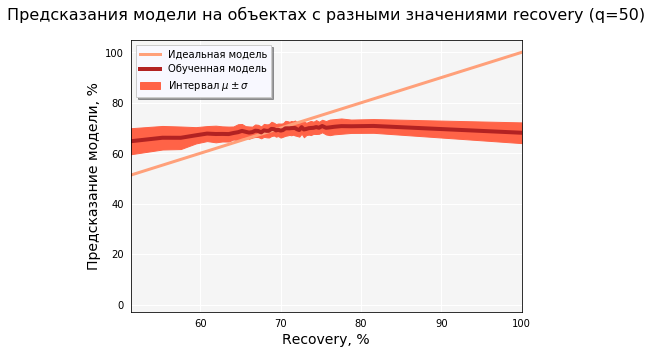

In [128]:
plot_true_pred(y_test, pred_final, q=50)

Действительно, эта модель на всех объектах предсказывает в среднем 70%, т.е. среднее значение recovery на обучающей выборке :(

In [129]:
resid = pd.DataFrame({'true': y_test, 'pred': pred_final})
resid['delta'] = resid['pred'] - resid['true']

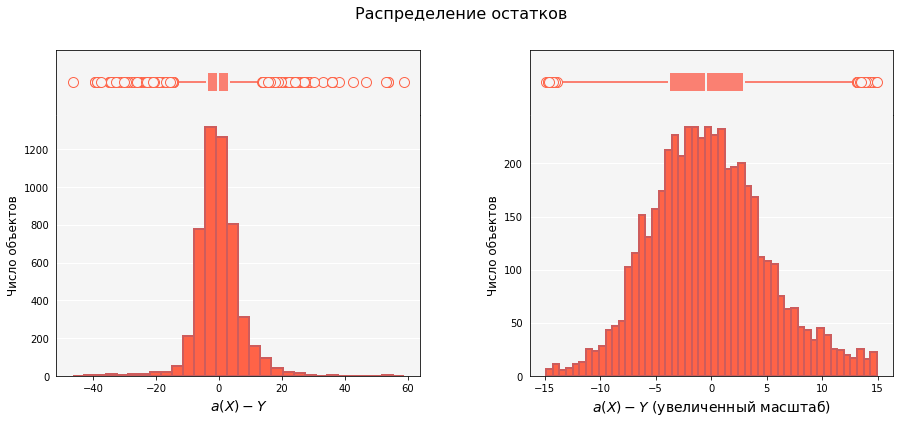

delta
min  -46.403
mean  -0.045
50%   -0.419
max   58.792

In [130]:
plot_distribution(
    [resid['delta'], resid[resid['delta'].abs() < 15]['delta']], bins=[30,50], 
    title='Распределение остатков', xlabels=['$a(X) - Y$', '$a(X) - Y$ (увеличенный масштаб)'], 
)
resid['delta'].describe().to_frame().loc[['min', 'mean', '50%', 'max']]

Остатки очень похожи на остатки предыдущей модели. Визуально это распределение кажется более симметричным.

### Вывод<a class="tocSkip">

Таким образом, лучшее качество получилось у линейной регрессии с лассо-регуляризацией.

# Расчёт итоговой sMAPE
[к оглавлению](#start)

Составим таблицу.

In [131]:
pd.DataFrame({
    'Константная модель': [scores.iloc[0,0], scores.iloc[2,0], res_smape(scores.iloc[0,0], scores.iloc[2,0])],
    'Лучшая модель': [scores.iloc[1,0], scores.iloc[3,0], res_smape(scores.iloc[1,0], scores.iloc[3,0])]
}, index=['sMAPE (rougher)', 'sMAPE (final)', 'Итоговая sMAPE']).T

sMAPE (rougher)  sMAPE (final)  Итоговая sMAPE
Константная модель            4.556          7.576           6.821
Лучшая модель                 4.294          7.190           6.466

Итоговая sMAPE немного выше, чем у константной модели. Ура :)

# Общий вывод 
[к оглавлению](#start)

Исследование эффективности обогащения золотосодержащей руды завершено.

1. Выполнена предобработка данных.
2. Проведён исследовательский анализ данных. Изучены распределения объектов по имеющимся признакам. Проанализированы взаимосвязи между признаками и их корреляция с целевой переменной.
3. Построены две модели машинного обучения, с хорошей точностью предсказывающие эффективности обогащения чернового и финального концентратов. Подобраны оптимальные гиперпараметры, проанализированы сильные и слабые стороны моделей.

## Основные результаты:<a class="tocSkip">

### 1. Предсказание эффективности обогащения чернового концентрата<a class="tocSkip">

Наилучшее качество у случайного леса со следующими гиперпараметрами:  

| Модель | Обработка пропусков train | Обработка пропусков test |n_estimatores | max_depth | min_samples_leaf | max_features |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Случайный лес | drop | ffill | 100 | 15 | 70 | 0.6 |

* Модель обучалась на признаках, относящихся к этапу `rougher`. Наиболее значимыми признаками являются концентрации металлов (в особенности, Ag) в сырье, а также объём воздуха и уровень жидкости на этапе $a$ и содержание ксантогената. Размер гранул сырья также учитывался при обучении модели.
* Скорость подачи руды, а также содержание сульфида натрия практически не влияют на предсказание модели.

### 2. Предсказание эффективности обогащения финального концентрата<a class="tocSkip">

Наилучшее качество у линейной регрессии со следующими гиперпараметрами:  

| Модель | Обработка пропусков train | Обработка пропусков test | Добавление признаков | Масштабирование |  Регуляризация | $\alpha$ |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Линейная регрессия | ffill | ffill | предсказанная первой моделью recovery | StandardScaler | $\ell_1$ | 1 |

* Модель обучалась на всех признаках, доступных в тестовой выборке. В обучающую выборку была также добавлена эффективность обогащения чернового концентрата, предсказанная первой моделью. Именно она является наиболее значимым признаком в модели. Среди других значимых признаков концентрация золота в сырье, содержание ксантогената на этапе флотации и концентрация $Na_2S$ на этапе первичной очистки. Все остальные признаки имеют нулевой вес.

Данные о качестве обеих моделей содержатся в таблице:

In [132]:
scores

sMAPE  RMSE   MAE     R2
Этап      Модель             Пропуски                         
Флотация  Константная модель —        4.556 6.331 3.770 -0.021
          Случайный лес      drop     4.294 5.333 3.525  0.275
Финальный Константная модель —        7.576 7.412 5.088 -0.014
          Линейная регрессия ffill    7.190 6.973 4.822  0.103

Обе модели вменяемы: их качество лучше, чем у константной. Тем не менее, добиться значительного выигрыша в качестве по сравнению с константной моделью не удалось. 


### 3. Итоговая sMAPE<a class="tocSkip">

Оценка итоговой sMAPE на тестовой выборке 6.466%, что немного превосходит sMAPE константной модели 6.821%.

Что можно сделать для улучшения результата?
1. В ходе предобработки и анализа данных очень не хватает информации о физическом смысле признаков и единицах измерения. Из-за этого не всегда понятно, является ли значение аномалией. Данные изначально были очень грязные: большое число пропусков, нулей и выбросов. Возможно, более 'осмысленная' предобработка с пониманием физического смысла позволит лучше очистить данные. 
2. Анализ моделей показал, что решающий вклад в эффективность обогащения руды вносит качество сырья, т.е. концентрации в нём различных металлов. У нас в наличии были данные лишь о четырёх компонентах сырья, суммарная концентрация которых в среднем меньше 60%. Возможно, более подробная информация о других компонентах руды и их концентрациях позволит улучшить качество модели.
3. В исходной выборке содержались расчётные характеристики `calculation`, которые не использовались при обучении модели (т.к. они становятся известны уже после обогащения руды и могут привести к data leak). К этим признакам относится, например, отношение $Na_2S$ к золоту или отношение золота к свинцу. Понимание смысла этих переменных могло бы пролить свет на технический процесс. Возможно, на эффективность флотации влияют не сами концентрации компонентов и сырья и флотационных реагентов, а какие-то комбинации этих признаков.
4. При обучении модели значимыми признаками были уровни жидкости и объёмы воздуха. Признаков этого типа довольно много и все они индексируются числом (10 или 11) и буквой (a-f). Распределения признаков очень похожи, а физический смысл не был пояснён заказчиком: относятся ли эти измерения к разным временным промежуткам, к разным флотационным установкам или это одновременные измерения, полученные с разных датчиков. Понимание смысла индексов позволит более разумно предобработать эти признаки.
5. То же самое касается флотационных реагентов: неизвестен ни физический смысл индексов, ни единицы измерения.
6. Плюс, возможно, есть какие-то ещё параметры процесса, которые могут влиять на результат (например, температура или скорость конвейера), но нам не доступны.